# Entrega evaluación módulo Clasificadores#  
Se recibe una base modificada de la encuesta Casen 2017, a partir de la cual se desea generar un modelo capaz de predecir el nivel de pobreza de una persona a partir de otras variables.

## Análisis exploratorio ##  
Considerando que se tienen dos archivos, formatos xlsx y csv, se inicia corroborando que la información en ellos es la misma.

In [138]:
import pandas as pd

In [139]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [140]:
data = pd.read_csv("/content/drive/MyDrive/CASEN_2017_select.csv", encoding="ISO-8859-1")
data.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [141]:
dataxls = pd.read_excel("/content/drive/MyDrive/CASEN_2017_select.xlsx", index_col=None)
dataxls.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),S�,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),S�,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,B�sica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de uni�n civil,S�,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de uni�n civil,S�,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema P�blico FONASA Grupo B,341667.0,No pobres,15.0,T�cnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [142]:
#Se verifica que ambos archivos tienen la misma forma (cantidad de columnas y filas)
#y que los nombres de las columnas son las mismas

list(data.columns)==list(dataxls.columns) and data.shape == dataxls.shape

True

In [143]:
#Se verifica que los folios en ambas bases sean los mismo, es decir, que sean los mismo encuestados
#y se compara un valor numérico "ytot" correspondiente al ingreso que declararon los encuestados

data["folio"].equals(dataxls["folio"]) and data["ytot"].equals(dataxls["ytot"])

True

Considerando que ambos archivos presentan la misma información, se decide trabajar con la base en formato CSV ya que no presenta caracteres extraños cuando existen tildes, como se puede ver en la salida de dataxls.head()

In [144]:
#Revisión del número de filas y columnas

print(data.shape)
list(dataxls.columns)

(216439, 18)


['folio',
 'sexo',
 'edad',
 'ecivil',
 'o1',
 'oficio1',
 'o16',
 's12',
 'ytot',
 'pobreza',
 'esc',
 'educ',
 'depen',
 'activ',
 'indmat',
 'indsan',
 'calglobviv',
 'hacinamiento']

Se tiene una base de 216.439 entradas con 18 columnas que, de acuerdo a la información recibida, corresponden a:

<table>
    <thead>
        <tr>
            <th>Nombre</th>
            <th>Descripción</th>
        </tr>
    </thead>
    <tbody align="left">
        <tr>
          <td align="center">sexo</td>
          <td>Sexo</td>
        </tr>
        <tr>
          <td align="center">edad</td>
          <td>Edad</td>
        </tr>
        <tr>
          <td align="center">ecivil</td>
          <td>Estado civil</td>
        </tr>
        <tr>
          <td align="center">esc</td>
          <td>Escolaridad</td>
        </tr>
        <tr>
          <td align="center">educ</td>
          <td>Nivel educacional</td>
        </tr>
        <tr>
          <td align="center">depen</td>
          <td>Dependencia administrativa</td>
        </tr>
        <tr>
          <td align="center">activ</td>
          <td>Condición de actividad</td>
        </tr>
        <tr>
          <td align="center">indsmat</td>
          <td>Indicador de materialidad</td>
        </tr>
        <tr>
          <td align="center">indsan</td>
          <td>Indicador de saneamiento</td>
        </tr>
        <tr>
          <td align="center">calglobviv</td>
          <td>Calidad global de la vivienda</td>
        </tr>
        <tr>
          <td align="center">hacinamiento</td>
          <td>Hacinamiento</td>
        </tr>
        <tr>
          <td align="center">s12</td>
          <td>Sistema de salud previsional</td>
        </tr>
        <tr>
          <td align="center">o16</td>
          <td>Tipo de contrato</td>
        </tr>
        <tr>
          <td align="center">o1</td>
          <td>Empleado</td>
        </tr>
        <tr>
          <td align="center">oficio1</td>
          <td>Ocupación u oficio</td>
        </tr>
        <tr>
          <td align="center">ytot</td>
          <td>Ingreso Total</td>
        </tr>
    </tbody>
</table>

Además de las columnas descritas, se tiene la columna "folio" que identifica al encuestado y "pobreza" que identifica el nivel de pobreza del encuestado, clasificado como:  
1.   Pobres extremos
2.   Pobres no extremos
3.   No pobres
4.   Blancos

### Revisión previa - Datos nulos ###

In [145]:
#Revisión previa de la información

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   folio         216439 non-null  int64  
 1   sexo          216439 non-null  object 
 2   edad          216439 non-null  int64  
 3   ecivil        216439 non-null  object 
 4   o1            175076 non-null  object 
 5   oficio1       92417 non-null   object 
 6   o16           68630 non-null   object 
 7   s12           216439 non-null  object 
 8   ytot          144706 non-null  float64
 9   pobreza       216231 non-null  object 
 10  esc           174058 non-null  float64
 11  educ          216439 non-null  object 
 12  depen         58122 non-null   object 
 13  activ         175076 non-null  object 
 14  indmat        216439 non-null  object 
 15  indsan        216439 non-null  object 
 16  calglobviv    216439 non-null  object 
 17  hacinamiento  216439 non-null  object 
dtypes: f

In [146]:
#Revisión de datos perdidos

data.isnull().sum().sort_values(ascending=False)

depen           158317
o16             147809
oficio1         124022
ytot             71733
esc              42381
activ            41363
o1               41363
pobreza            208
sexo                 0
edad                 0
ecivil               0
hacinamiento         0
s12                  0
calglobviv           0
educ                 0
indmat               0
indsan               0
folio                0
dtype: int64

Considerando que se trabajará en la estimación de la pobreza, se eliminarán las 208 entradas que contienen datos nulos en la variable pobreza, que representan el **0.10%** del registros, que no son útiles para el estudio.

In [147]:
#Considerando que se trabajará en la estimación de la pobreza, se eliminarán las 208 entradas que contienen
#datos nulos en la variable pobreza, que representan el 0.10% del registros, que no son útiles para el estudio.

data = data[data['pobreza'].notna()]
data.isnull().sum().sort_values(ascending=False)

depen           158118
o16             147803
oficio1         124016
ytot             71721
esc              42364
activ            41359
o1               41359
sexo                 0
edad                 0
ecivil               0
hacinamiento         0
s12                  0
calglobviv           0
pobreza              0
educ                 0
indmat               0
indsan               0
folio                0
dtype: int64

Con los registros que tienen valores de "pobreza" nulos filtrados, se identifica que 41.359 registros tienen "o1 y "activ" nulos.  
De acuerdo a la encuesta Casen, la pregunta que da origen a la variable "o1" refiere a si el encuestado trabajó al menos 1 hr la semana anterior a ser consultado, sin contrar los quehaceres del hogar. Esta pregunta está condicionada a si la persona tiene 15 años o más de edad, de modo que los valores nulos deberían corresponder a personas de edad menor a 15 años.

In [148]:
data[data["o1"].isnull()]["edad"].describe()

count    41359.000000
mean         7.172997
std          4.229413
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: edad, dtype: float64

De acuerdo al output anterior, se comprueba que todos los registros con "o1" nulo corresponden a edades de 14 años y menos, lo que es esperable de acuerdo a lo descrito anteriormente.  
Adicionalmente, se identifica la presencia de registros con la variable "edad"=0, lo que no tiene sentido.

In [149]:
#Verificación de cantidad de registros con edad 0 en la data y si
#todos estos registros tienen "o1" con valor nulo.

print(data[data["edad"]==0]["edad"].count())
data[data["edad"]==0]["edad"].count() == data[(data["edad"]==0) & (data["o1"].isnull())]["edad"].count()

2147


True

Se obtiene en la base filtrada con pobreza nula existen 2147 registros con edad 0, y en todos los casos también tienen un valor de "o1" nulo. Por lo anterior, se eliminan estos registros, representando un total de **0.99%** del total de datos.

In [150]:
#Considerando que se trabajará en la estimación de la pobreza, se eliminarán las 208 entradas que contienen
#datos nulos en la variable pobreza, que representan el 0.10% del registros, que no son útiles para el estudio.

data = data[data['edad']!=0]
data.isnull().sum().sort_values(ascending=False)

depen           156095
o16             145656
oficio1         121869
ytot             70029
esc              40217
activ            39212
o1               39212
sexo                 0
edad                 0
ecivil               0
hacinamiento         0
s12                  0
calglobviv           0
pobreza              0
educ                 0
indmat               0
indsan               0
folio                0
dtype: int64

De los registros con valor nulo 39.212 corresponden a encuestados menores de 15 años que no indican si están empleados ("o1") ni la condición de la actividad ("activ"), ya que la encuesta condiciona esa pregunta sólo a personas de 15 años o más de edad.  
Continuando con la revisión de las variables asociadas a lo laboral, "oficio1" corresponde a la respuesta de la pregunta "¿Cuál es su profesión u oficio?". Esta pregunta está condicionada a que la persona haya respondido "Sí" a que trabajó 1 hr durante la semana anterior a ser consultado ("o1"), o que haya realizado una actividad para su trabajo (con o sin remuneración) o que no haya asistido por licencia, permiso, etc. Esta pregunta, a su vez, también se hace sólo a mayores de 15 años.

In [151]:
a = data[(data["oficio1"].isnull()) & (data["o1"].isnull())]["folio"].count()
b = data[(data["oficio1"].isnull()) & (data["o1"]=="No")]["folio"].count()
print(a)
print(b)
print(a+b)

39212
82657
121869


De lo anterior, se concluye que el total de valores nulo en la variable "oficio1" corresponden a personas menores de 15 años y personas que no trabajaron la semana anterior ("o1"), siendo ambos requisitos para responder las consultas. En conclusión, no se eliminan estos registros nulos.  
La última variables asociada a lo laboral corresponde a la variable "o16", que responde a la identificación del contrato que tiene el encuestado, siendo las alternativas "Plazo indefinido" o "Plazo fijo". Para responder esta pregunta el encuestado debe cumplir con:
*   Edad mayor o igual a 15 años ("edad")
*   Haber trabajado al menos 1 hr la semana anterior ("o1")
*   No ser patrón, empleador o trabajador por cuenta propia
  
Esta última pregunta no está reflejada en alguna variable directamente, por lo que de los 145.656 valores nulos se concluirá respecto a las variables anteriores.

In [152]:
#a: Valores "o16" nulos con oficio1 nulo
a=data[(data["o16"].isnull()) & (data["oficio1"].isnull())]["folio"].count()

#b: Valores "o16" nulos sin oficio1 nulo que respondieron sí estar trabajando la semana anterior
b=data[(data["o16"].isnull()) & (data["oficio1"].notna()) & (data["o1"]=="Sí")]["folio"].count()

#c: Valores "o16" nulos sin oficio1 nulo que respondieron no estar trabajando la semana anterior
c=data[(data["o16"].isnull()) & (data["oficio1"].notna()) & (data["o1"]=="No")]["folio"].count()

print(a)
print(b)
print(c)
print(a+b+c)

121869
22873
914
145656


El total de 145.656 valores nulos de la variable "o16" (tipo de contrato) se compone de 121.869 personas que no responden a esta pregunta por no haber trabajado el mes anterior y/o tener menos de 15 años.  
Por otra parte, 22.873 personas declaran sí haber trabajado el mes anterior, pero no responden esta pregunta. De acuerdo a la encuesta Casen, esta pregunta no la deben responder patrones o empleadores, trabajadores por cuenta propia y personas que trabajen no remuneradamente con un familiar.  
Finalmente, hay 914 personas que declaran no haber trabajado la semana anterior a la encuesta, con "o16" nulo, pero con la variable "oficio1" no nula. Esto no es congruente, ya que quien declara no haber trabajado debería tener "oficio1" nulo. Por este motivo, se decide eliminar los 914 casos que representan un **0.42%** de los casos.

In [153]:
data.drop(data[(data["o16"].isnull()) & (data["oficio1"].notna()) & (data["o1"]=="No")].index,inplace=True)

In [154]:
data.isnull().sum().sort_values(ascending=False)

depen           155267
o16             144742
oficio1         121869
ytot             69916
esc              40212
activ            39212
o1               39212
sexo                 0
edad                 0
ecivil               0
hacinamiento         0
s12                  0
calglobviv           0
pobreza              0
educ                 0
indmat               0
indsan               0
folio                0
dtype: int64

En la revisión de las variables asociadas a la educación de los encuestados, extisten 40.212 registros con la variable "esc" nula. Esta variable representa los años de escolaridad que ha alcanzado el encuestado.  
Para comprender su distribución se grafica de acuerdo a la variable "educ" que representa el nivel educacional alcanzado por el encuestado.

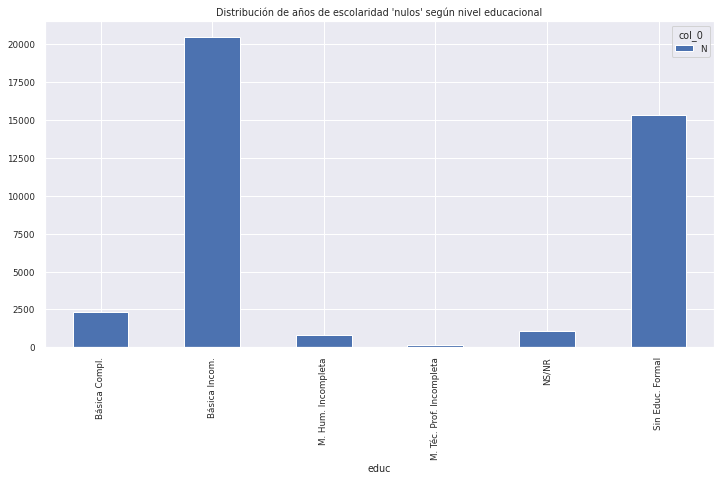

In [155]:
import matplotlib.pyplot as plt

datos_grafico = pd.crosstab(index=data[data["esc"].isnull()]["educ"], columns=["N"])
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de años de escolaridad 'nulos' según nivel educacional")

<table>
    <thead>
        <tr>
            <th>Años de escolaridad "esc"</th>
            <th>Nivel educacional "educ"</th>
            <th>Valor asigado en "esc_aux"</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td rowspan=6>Nulo</td>
            <td>Básica Compl.</td>
            <td>8</td>
        </tr>
        <tr>
            <td>Básica Incom.</td>
            <td>Promedio "esc" no nulos con "educ" Básica Incom.</td>
        </tr>
        <tr>
            <td>M. Hum. Incompleta</td>
            <td>Promedio "esc" no nulos con "educ" M. Hum. Incompleta</td>
        </tr>
        <tr>
            <td>M. Tec. Prof. Incompleta</td>
            <td>Promedio "esc" no nulos con "educ" M. Tec. Prof. Incompleta</td>
        </tr>
        <tr>
            <td>NS/NR</td>
            <td><em>eliminado</em></td>
        </tr>
        <tr>
            <td>Sin Educ. Formal</td>
            <td>0</td>
        </tr>
    </tbody>
</table>

In [156]:
list(data["educ"].unique())

['M. Hum. Completa',
 'Básica Incom.',
 'Técnico Nivel Superior Completo',
 'Sin Educ. Formal',
 'M. Hum. Incompleta',
 'M. Téc Completa',
 'Básica Compl.',
 'Profesional Incompleto',
 'Profesional Completo',
 'M. Téc. Prof. Incompleta',
 'Técnico Nivel Superior Incompleta',
 'Postgrado Completo',
 'Postgrado Incompleto',
 'NS/NR']

In [157]:
#La ejecución de esta función toma 8 minutos en google colab

def esc_aux_pop(datos):
  if datos["educ"]=="Básica Incom." and datos["esc"]!=datos["esc"]:
    return data[(data["esc"].notna()) & (data["educ"]=="Básica Incom.")]["esc"].mean()
  elif datos["educ"]=="Sin Educ. Formal" and datos["esc"]!=datos["esc"]:
    return int(0)
  elif datos["educ"]=="Básica Compl." and datos["esc"]!=datos["esc"]:
    return int(8)
  elif datos["educ"]=="M. Hum. Incompleta" and datos["esc"]!=datos["esc"]:
    return data[(data["esc"].notna()) & (data["educ"]=="M. Hum. Incompleta")]["esc"].mean()
  elif datos["educ"]=="M. Téc. Prof. Incompleta" and datos["esc"]!=datos["esc"]:
    return data[(data["esc"].notna()) & (data["educ"]=="M. Téc. Prof. Incompleta")]["esc"].mean()
  else:
    return datos["esc"]

data['esc_aux'] = data.apply (lambda datos: esc_aux_pop(datos), axis=1)

In [158]:
data.isnull().sum().sort_values(ascending=False)

depen           155267
o16             144742
oficio1         121869
ytot             69916
esc              40212
activ            39212
o1               39212
esc_aux           1106
sexo                 0
edad                 0
ecivil               0
pobreza              0
s12                  0
hacinamiento         0
educ                 0
indmat               0
indsan               0
calglobviv           0
folio                0
dtype: int64

In [159]:
data.drop(data[data["esc_aux"].isnull()].index,inplace=True)
data.isnull().sum().sort_values(ascending=False)

depen           154299
o16             144044
oficio1         121324
ytot             69579
activ            39106
o1               39106
esc              39106
esc_aux              0
sexo                 0
edad                 0
ecivil               0
pobreza              0
s12                  0
hacinamiento         0
educ                 0
indmat               0
indsan               0
calglobviv           0
folio                0
dtype: int64

Una vez creada la variable "esc_aux" de acuerdo a lo descrito anteriormente, se eliminan los 1.106 registros que contienen valores nulos en la variable "esc" (alos de escolaridad) y valores "NS/NR" en la variable "educ" (nivel educacional).  
Finalmente, la última variable que contiene datos nulos es "depen" que indica la dependencia administrativa del centro educacional al que asiste el encuestado.
Para comprender el origen de estos datos nulos se chequea el cuestionario Casen, identificando la pregunta e10 como la que da origen a este valor. Dentro del mismo análisis se verifica que esta pregunta está restringida a ser respondida sólo por personas que al moemento de ser encuestadas asisten a algún establecimiento educacional, incluyendo programas de nivelación para completar educación básica o media.  
Por lo anterior, se determina no eliminar los datos nulos, ya que es esperable encontrarlos en los casos en que los encuestados no estén cursando estudios.

### Distribución de las variables ###  
Como parte del análisis exploratorio, se revisa la distribución de los datos para comprender el comportamiento de ellos.

Text(0.5, 1.0, 'Ingreso total por sexo')

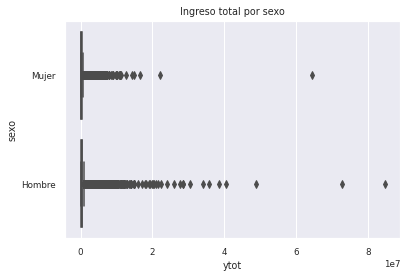

In [160]:
import seaborn as sns
import numpy as np

sns.boxplot(x=data["ytot"], y="sexo", data=data).set_title("Ingreso total por sexo")

En el gráfico anterior se puede ver la distribución de los ingresos totales por sexo. En el mismo se observa que los ingresos de los hombres tienden a ser mayores que el de las mujeres. Además, se puede ver una gran cantidad de outliers que podrían afectar al modelo.  
Para evitar que el modelo se vea afectado por los outliers se normalizarán los valores de los ingresos para llevarlos a una distribución normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


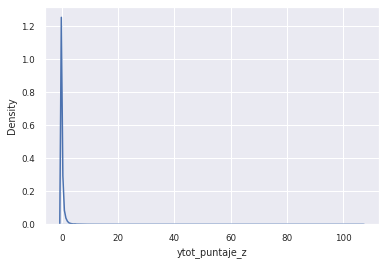

In [161]:
data["ytot_puntaje_z"] = (data["ytot"]-data["ytot"].mean())/data["ytot"].std(ddof=0)
sns.distplot(data["ytot_puntaje_z"],bins=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


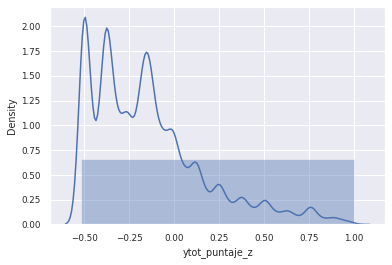

In [162]:
data_mod = data[data["ytot_puntaje_z"]<=1] #filtro de súper ricos
sns.distplot(data_mod["ytot_puntaje_z"],bins=1)

Habiendo filtrado los datos de los outliers por ingreso (súper ricos), se grafica nuevamente la distribución del ingreso por sexo.

Text(0.5, 1.0, 'Ingreso total por sexo')

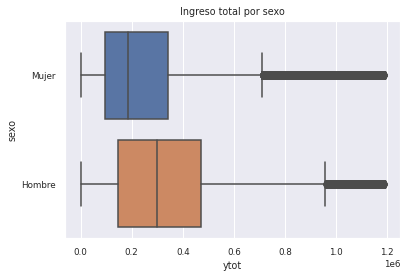

In [163]:
sns.boxplot(x=data_mod["ytot"], y="sexo", data=data_mod).set_title("Ingreso total por sexo")

Se puede observar con más detalle que efectivamente, considerando sólo el sexo, los hombres tienen ingresos totales mayores que las mujeres.

Text(0.5, 1.0, 'Distribución de la edad según pobreza')

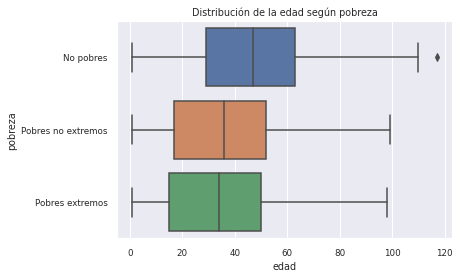

In [164]:
sns.boxplot(x=data_mod["edad"], y="pobreza", data=data_mod).set_title("Distribución de la edad según pobreza")

De acuerdo al gráfico, se puede ver que a quienes no son pobres presentan una mayor edad que quienes sí son pobres, tanto extremos como no extremos.

Para conocer la distribución de la pobreza entre hombres y mujeres, primero se debe conocer la distribución porcentual de hombres y mujeres respecto al total de la población.  
Si la pobreza afecta de igual forma a hombres y mujeres, es de esperar obtener el mismo porcentaje.

Población de Hombres: 48.5%
Población de Mujeres: 51.5%

Porcentaje de hombres pobres: 8.2%
Porcentaje de mujeres pobres: 9.4%

Porcentaje de pobres que son hombres: 45.2%
Porcentaje de pobres que son mujeres: 54.8%



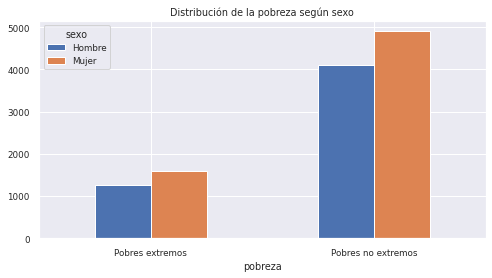

In [165]:
a = data_mod[data_mod["sexo"]=="Hombre"]["folio"].count() #Población de hombres
b = data_mod[data_mod["sexo"]=="Mujer"]["folio"].count()  #Población de mujeres
c = data_mod["folio"].count() #Población total
print("Población de Hombres: "+str(round(100*a/c,1))+"%")
print("Población de Mujeres: "+str(round(100*b/c,1))+"%\n")

d = data_mod[(data_mod["sexo"]=="Hombre") & (data_mod["pobreza"]!="No pobres")]["folio"].count() #Hombres pobres
e = data_mod[(data_mod["sexo"]=="Mujer") & (data_mod["pobreza"]!="No pobres")]["folio"].count()  #Mujeres pobres
f = data_mod[data_mod["pobreza"]!="No pobres"]["folio"].count() #Total pobres

print("Porcentaje de hombres pobres: "+str(round(100*d/a,1))+"%")
print("Porcentaje de mujeres pobres: "+str(round(100*e/b,1))+"%\n")

print("Porcentaje de pobres que son hombres: "+str(round(100*d/f,1))+"%")
print("Porcentaje de pobres que son mujeres: "+str(round(100*e/f,1))+"%\n")

datos_grafico = pd.crosstab(index=data_mod[data_mod["pobreza"]!="No pobres"]["pobreza"], columns=data_mod["sexo"])
datos_grafico.plot(kind="bar", rot=0,figsize=(8,4), title="Distribución de la pobreza según sexo")

Con lo expuesto, se puede identificar que existe una distribución semejante de la pobreza en la población masculina y femenina, presentando esta última una mayor tendencia a ser pobres con un 9.4% da las mujeres en esta condición, mientras los hombres alcanzan un 8.2%.  
Se determina que el sexo no es una variable relevante a la hora de predecir el nivel de pobreza.

Text(0.5, 1.0, 'Años de escolaridad según nivel de pobreza')

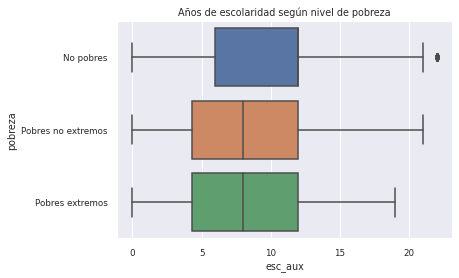

In [166]:
sns.boxplot(x=data_mod["esc_aux"], y="pobreza", data=data_mod).set_title("Años de escolaridad según nivel de pobreza")

En los gráficos se aprecia una tendencia en los "No pobres" a tener años de escolaridad mayores a los clasificados como "Pobres no extremos" y "Pobres extremos". En ambos casos la diferencia es superior a 2 años de escolaridad, mientras que entre pobres extremos y no extremos la diferencia es menor a 1 año de escolaridad.  
A pesar de lo anterior, por su distribución no se identifica como una variable determinante para identificar "No pobres" de "pobres no extremos" y "pobres extremos".

In [167]:
for pobreza in data_mod.drop_duplicates(subset = ["pobreza"])["pobreza"]:
  print("Escolaridad promedio en '"+pobreza+"': "+str(round(data_mod[data_mod["pobreza"]==pobreza]["esc_aux"].mean(),1)))


Escolaridad promedio en 'No pobres': 9.9
Escolaridad promedio en 'Pobres no extremos': 7.5
Escolaridad promedio en 'Pobres extremos': 7.4


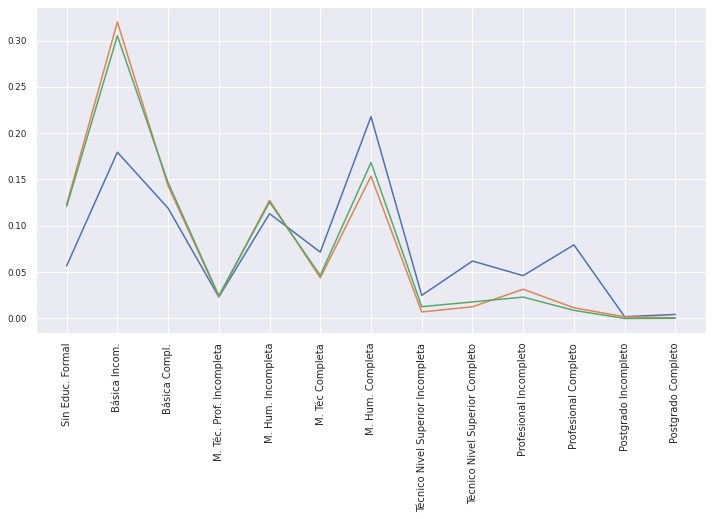

In [168]:
orden_filas=list(['Sin Educ. Formal','Básica Incom.','Básica Compl.','M. Téc. Prof. Incompleta','M. Hum. Incompleta',
                  'M. Téc Completa','M. Hum. Completa','Técnico Nivel Superior Incompleta','Técnico Nivel Superior Completo',
                  'Profesional Incompleto','Profesional Completo','Postgrado Incompleto','Postgrado Completo'])
datos_grafico = pd.crosstab(index=data_mod["educ"], columns=data_mod["pobreza"], normalize="columns")

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(datos_grafico.reindex(orden_filas))
ax.set_xticklabels(datos_grafico.reindex(orden_filas).index, rotation=90, fontsize=10)
plt.show()

In [169]:
datos_grafico.reindex(orden_filas)

pobreza,No pobres,Pobres extremos,Pobres no extremos
educ,,,
Sin Educ. Formal,0.056794,0.123028,0.120910
Básica Incom.,0.179465,0.320014,0.305047
Básica Compl.,0.119038,0.143007,0.146534
M. Téc. Prof. Incompleta,0.023241,0.023835,0.024515
M. Hum. Incompleta,0.113124,0.127585,0.125568
M. Téc Completa,0.071587,0.043814,0.046478
M. Hum. Completa,0.217809,0.153523,0.168275
Técnico Nivel Superior Incompleta,0.024951,0.007010,0.012757
Técnico Nivel Superior Completo,0.062000,0.012618,0.017859



Por otra parte, según la distribución de pobres y no pobres según el nivel de educación, se observa que más del 30% de los pobres tiene escolaridad básica incompleta.  
Del mismo modo, para la población no pobre se aprecia que tiene un mayor nivel de educación, alcanzando su peak en 22% con "Educación Media Humanista Científica Completa".

Text(0.5, 1.0, 'Distribución de los ingresos según pobreza')

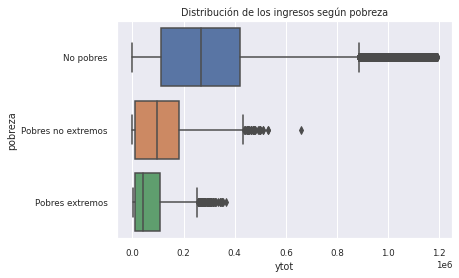

In [170]:
sns.boxplot(x=data_mod["ytot"], y="pobreza", data=data_mod).set_title("Distribución de los ingresos según pobreza")

En el caso de los ingresos, se aprecia una clara tendencia a que la población no pobre presente mayores ingresos que la población pobre no extrema y que esta última tenga mayores ingresos que la población pobre extrema.

pobreza,No pobres,Pobres extremos,Pobres no extremos
indmat,,,
SD/NR,0.001597,0.000701,0.001664
Vivienda Aceptable,0.873842,0.769366,0.797227
Vivienda Irrecuperable,0.002656,0.018577,0.008763
Vivienda Recuperable,0.121906,0.211356,0.192346


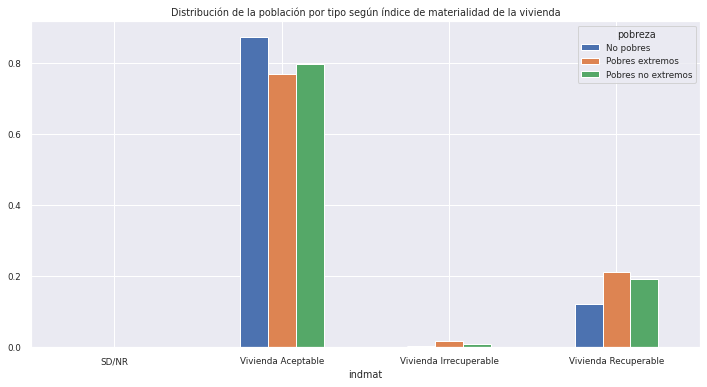

In [171]:
datos_grafico = pd.crosstab(index=data_mod["indmat"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=0,figsize=(12,6), title="Distribución de la población por tipo según índice de materialidad de la vivienda")
datos_grafico

La distribución de la población según el índice de materialidad de la vivienda es semejante para la población no pobre, en pobreza extrema y no extrema, no identificando un patrón claro que pueda determinar si dado un índice de materialidad se pueda definir a qué clasificación según nivel de pobreza pertenece la persona encuestada.  
Se determina que no es una variable relevante para el estudio.

pobreza,No pobres,Pobres extremos,Pobres no extremos
calglobviv,,,
Aceptable,0.832802,0.626358,0.677427
Irrecuperable,0.007356,0.035752,0.020410
Recuperable,0.157471,0.336838,0.298946
Sin dato,0.002370,0.001052,0.003217


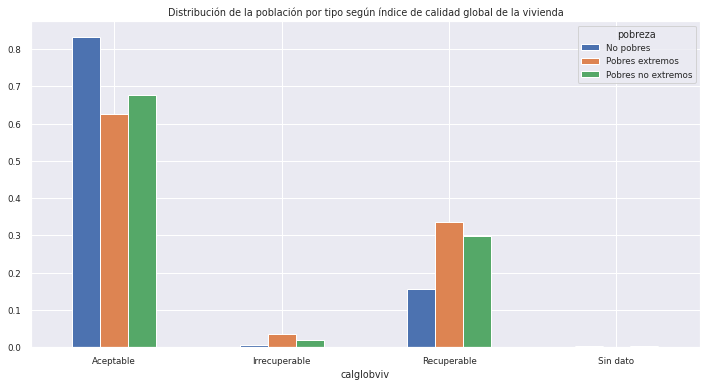

In [172]:
datos_grafico = pd.crosstab(index=data_mod["calglobviv"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=0,figsize=(12,6), title="Distribución de la población por tipo según índice de calidad global de la vivienda")
datos_grafico

pobreza,No pobres,Pobres extremos,Pobres no extremos
indsan,,,
Aceptable,0.910141,0.732913,0.790682
Deficitario,0.089183,0.266737,0.207876
Sin Dato,0.000676,0.000351,0.001442


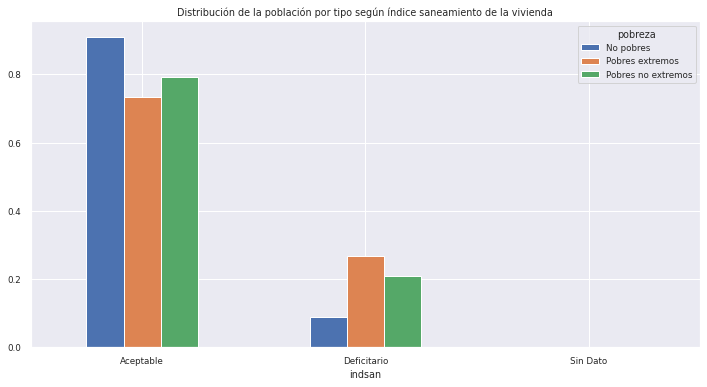

In [173]:
datos_grafico = pd.crosstab(index=data_mod["indsan"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=0,figsize=(12,6), title="Distribución de la población por tipo según índice saneamiento de la vivienda")
datos_grafico

De los indicadores de saneamiento de vivienda, de materialidad y calidad global de la vivienda, los tres presentan un comportamiento similar y entregan información respecto a la vivienda. Por este motivo es que se decide trabajar con una sola de las variables, siendo el indicador global de vivienda la elegida ya que por su definición como indicador considera más factores.

pobreza,No pobres,Pobres extremos,Pobres no extremos
o1,,,
No,0.368667,0.606437,0.545275
Sí,0.631333,0.393563,0.454725


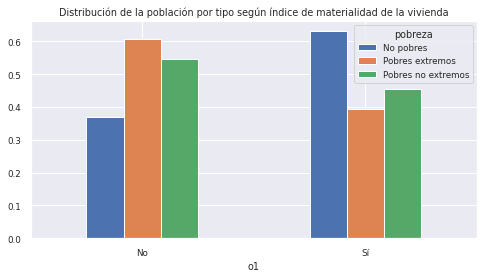

In [174]:
datos_grafico = pd.crosstab(index=data_mod["o1"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=0,figsize=(8,4), title="Distribución de la población por tipo según índice de materialidad de la vivienda")
datos_grafico

Se observa una tendencia a que no pobres sí están trabajando, mientras que la mayoría de pobres extremos y no extremos no están trabajando.

pobreza,No pobres,Pobres extremos,Pobres no extremos
oficio1,,,
Agricultores y trabajadores calificados agropecuarios y pesq,0.052125,0.160592,0.126249
Empleados de oficina,0.077701,0.023918,0.033909
Fuerzas Armada,0.004287,0.000000,0.000908
Miembros del poder ejecutivo y de los cuerpos legislativo,0.036355,0.015945,0.020587
"Oficiales, operarios y artesanos de artes mecánicas y de otr",0.147774,0.181093,0.171662
Operadores de instalaciones y máquinas y montadore,0.095270,0.051253,0.066303
"Profesionales, científicos e intelectuale",0.080826,0.004556,0.008477
Sin dato,0.002678,0.003417,0.001211
Trabajadores de los servicios y vendedores de comerci,0.163856,0.175399,0.155011


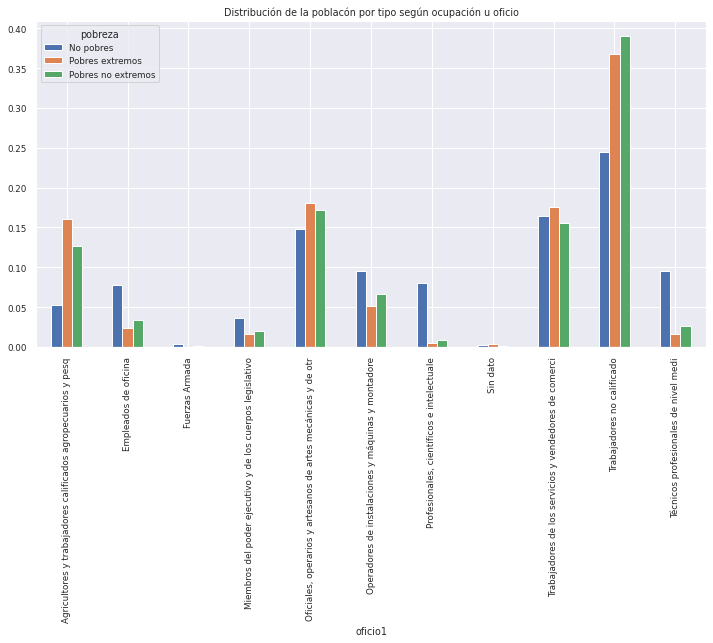

In [175]:
datos_grafico = pd.crosstab(index=data_mod["oficio1"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de la poblacón por tipo según ocupación u oficio")
datos_grafico

Se observa que existe una relación entre la ocupación u oficio del encuestado respecto al nivel de pobreza, como el caso de "Profesionales, científicos e intelectuales" que son principalmente personas clasificadas como no pobres, mientras trabajos de "Agricultores y trabajadores calificados agropecuarios y pequeras" ocupados por personas en pobreza extrema y no extrema.

pobreza,No pobres,Pobres extremos,Pobres no extremos
o16,,,
No sabe/no responde,0.003613,0.004963,0.001493
Plazo fijo,0.311486,0.622829,0.510204
Plazo indefinido,0.684902,0.372208,0.488303


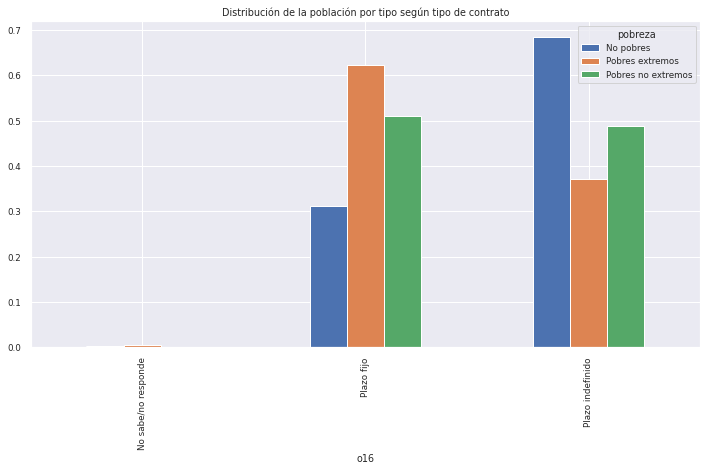

In [176]:
datos_grafico = pd.crosstab(index=data_mod["o16"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de la población por tipo según tipo de contrato")
datos_grafico

En el caso de los tipos de contratos, también se nota una distribución muy acentuada en la que los contratos a plazo fijo están muy relacionados a las personas pobres extremas y no extremas, mientras que los contratos a plazo indefinido están asociados a las personas no pobres.

pobreza,No pobres,Pobres extremos,Pobres no extremos
activ,,,
Desocupados,0.022909,0.107586,0.051965
Inactivos,0.331088,0.488736,0.482890
Ocupados,0.646003,0.403678,0.465146


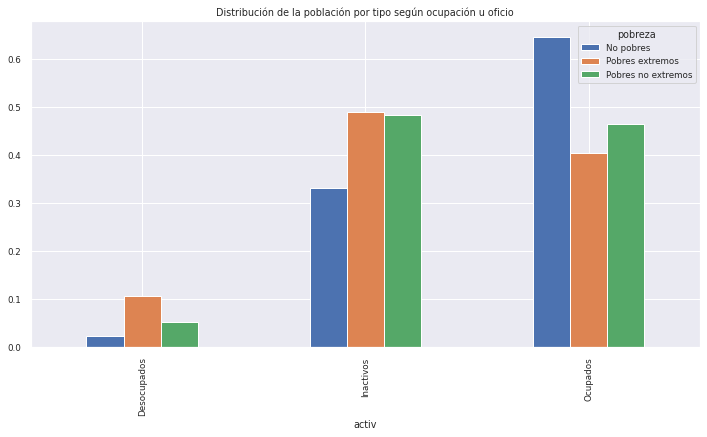

In [177]:
datos_grafico = pd.crosstab(index=data_mod["activ"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de la población por tipo según ocupación u oficio")
datos_grafico

Se descarta el uso de la variable "activ" (condición de actividad) ya que es redundante respecto a la variable "o1" que indica si la persona está trabajando o no.

pobreza,No pobres,Pobres extremos,Pobres no extremos
depen,,,
Centro de Formación Técnica,0.034675,0.003731,0.012581
Corporación de Administración Delegada (DL 3166),0.009771,0.007463,0.010412
Instituto Profesional,0.085160,0.012438,0.022993
Integra,0.015675,0.019900,0.026898
Junji,0.031282,0.054726,0.044252
Municipal,0.334939,0.565920,0.517570
NS/NR,0.009093,0.002488,0.002603
Otra dependencia,0.000136,0.000000,0.000000
Particular Pagado,0.020696,0.000000,0.001735


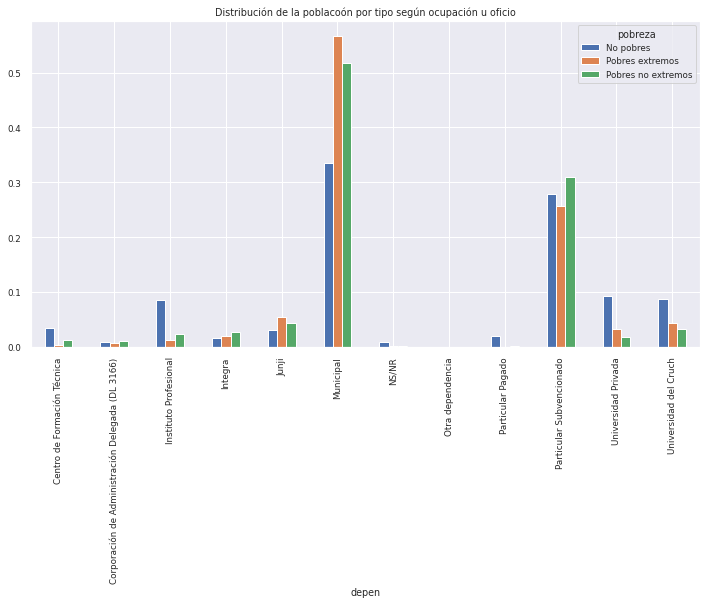

In [178]:
datos_grafico = pd.crosstab(index=data_mod["depen"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de la poblacoón por tipo según ocupación u oficio")
datos_grafico

Se aprecia una clara tendencia a que personas que actualmente estudian, que pertenecen a los grupos de pobreza extrema y no extrema, lo hagan en establecimientos municipales, mientras que pernonas no pobres lo hagan en universidades, institutos profesionales o centros de formación técnica.

pobreza,No pobres,Pobres extremos,Pobres no extremos
s12,,,
FF.AA. y de Orden,0.018117,0.002804,0.003106
ISAPRE,0.084238,0.013319,0.007876
Ninguno (Particular),0.024406,0.027340,0.018636
No sabe,0.020300,0.021030,0.015641
Otro sistema,0.007356,0.007010,0.006101
Sistema Público FONASA Grupo A,0.222411,0.647038,0.571159
Sistema Público FONASA Grupo B,0.350321,0.190326,0.268774
Sistema Público FONASA Grupo C,0.118443,0.035401,0.053023
Sistema Público FONASA Grupo D,0.099520,0.017876,0.024404


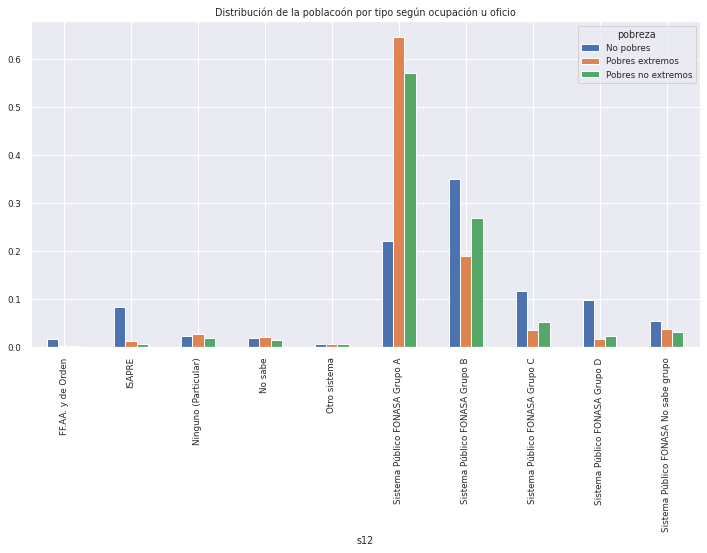

In [179]:
datos_grafico = pd.crosstab(index=data_mod["s12"], columns=data_mod["pobreza"], normalize="columns")
datos_grafico.plot(kind="bar", rot=90,figsize=(12,6), title="Distribución de la poblacoón por tipo según ocupación u oficio")
datos_grafico

Se aprecia una tendencia muy clara a que las personas en situación de pobreza extrema y no extrema estén afiliados a Fonasa Grupo A, mientras que en los siguientes grupus exista mayor presencia de no pobres. Por otra parte, en sistema de Isapre principalmente están afiliados no pobres.

In [180]:
data_mod.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento,esc_aux,ytot_puntaje_z
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)",12.0,-0.197256
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",7.0,-0.246748
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",12.0,-0.156871
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",12.0,-0.118712
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)",15.0,-0.080659


In [181]:
data_trabajo=data_mod.drop(["educ", "edad", "ytot", "esc", "esc_aux", "ytot_puntaje_z", "sexo"], axis='columns', inplace=False)
#data_trabajo = data_mod[["indmat","indsan","calglobviv","pobreza"]]
data_dico = pd.get_dummies(data_trabajo,drop_first=True)
data_dico

,folio,ecivil_Casado(a),ecivil_Conviviente civil (con acuerdo de unión civil),ecivil_Conviviente o pareja sin acuerdo de unión civil,ecivil_Divorciado (a),ecivil_Separado(a),ecivil_Soltero(a),ecivil_Viudo(a),o1_Sí,oficio1_Empleados de oficina,oficio1_Fuerzas Armada,oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo,"oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr",oficio1_Operadores de instalaciones y máquinas y montadore,"oficio1_Profesionales, científicos e intelectuale",oficio1_Sin dato,oficio1_Trabajadores de los servicios y vendedores de comerci,oficio1_Trabajadores no calificado,oficio1_Técnicos profesionales de nivel medi,o16_Plazo fijo,o16_Plazo indefinido,s12_ISAPRE,s12_Ninguno (Particular),s12_No sabe,s12_Otro sistema,s12_Sistema Público FONASA Grupo A,s12_Sistema Público FONASA Grupo B,s12_Sistema Público FONASA Grupo C,s12_Sistema Público FONASA Grupo D,s12_Sistema Público FONASA No sabe grupo,pobreza_Pobres extremos,pobreza_Pobres no extremos,depen_Corporación de Administración Delegada (DL 3166),depen_Instituto Profesional,depen_Integra,depen_Junji,depen_Municipal,depen_NS/NR,depen_Otra dependencia,depen_Particular Pagado,depen_Particular Subvencionado,depen_Universidad Privada,depen_Universidad del Cruch,activ_Inactivos,activ_Ocupados,indmat_Vivienda Aceptable,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable,indsan_Deficitario,indsan_Sin Dato,calglobviv_Irrecuperable,calglobviv_Recuperable,calglobviv_Sin dato,"hacinamiento_Hacinamiento medio alto (3,5 a 4,9)","hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)",hacinamiento_NS/NR,"hacinamiento_Sin hacinamiento (2,49 y menos)"
0,110110020201,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,110110020301,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,110110020401,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,110110020401,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,110110020501,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216434,1520130021601,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
216435,1520130021601,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
216436,1520130021701,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
216437,1520130021701,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1


Debido a que la gran mayoría de las variables del modelo son categóricas, no se puede obtener una correlación de Pearson. Sin embargo, se usa la distancia de Jaccard para identificar la similitud ya habiendo transformado las variables categóricas en binarias.

In [182]:
#Correlación
from sklearn.metrics.pairwise import pairwise_distances

jac_df = data_dico
jac_sim = 1 - pairwise_distances(jac_df.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=jac_df.columns, columns=jac_df.columns)

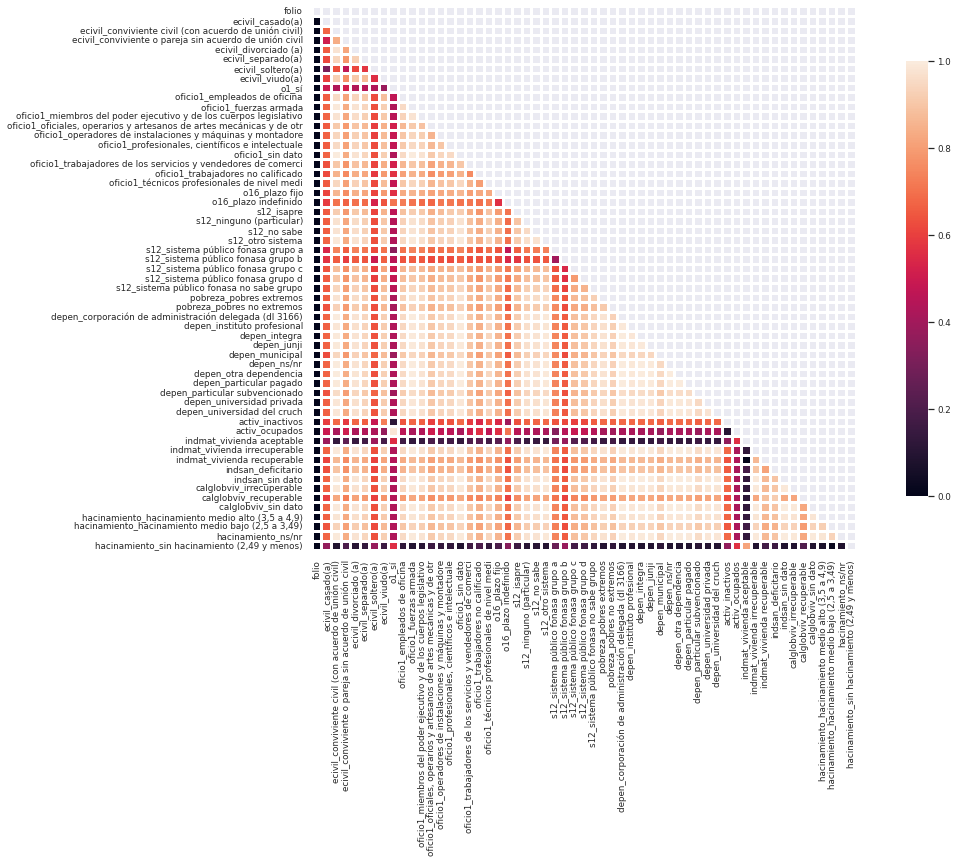

In [183]:
#Correlación
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(18, 10))
mask = np.triu(np.ones_like(jac_sim, dtype=np.bool))
corr = jac_sim.copy()
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", 
           linewidths=2, vmin=0, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)



yticks = [i.lower() for i in corr.index]
xticks = [i.lower() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)



plt.show()

Para trabajar con los modelos de regresión logística, naive bayer y árbol de decisiones, se pasará la variable pobreza a una variable binomial auxiliar que identifique si las personas son pobres (pobreza extrema y no extrema) o no pobres.

In [184]:
data_mod["pobreza_aux"] = data_mod.apply(lambda x : 1 if x.pobreza!="No pobres" else 0, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
data_mod[data_mod["pobreza"]!="No pobres"].head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento,esc_aux,ytot_puntaje_z,pobreza_aux
115,110110101301,Mujer,48,Casado(a),Sí,Empleados de oficina,Plazo indefinido,Sistema Público FONASA Grupo B,287686.0,Pobres no extremos,14.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",14.0,-0.149321,1
175,110110112001,Mujer,60,Separado(a),No,NaN,NaN,Sistema Público FONASA No sabe grupo,350000.0,Pobres no extremos,6.0,Básica Compl.,NaN,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",6.0,-0.070060,1
177,110110112001,Mujer,25,Soltero(a),No,NaN,NaN,Ninguno (Particular),5398.0,Pobres no extremos,9.0,M. Hum. Incompleta,Particular Subvencionado,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",9.0,-0.508383,1
274,110110170101,Hombre,30,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,150000.0,Pobres no extremos,8.0,Básica Compl.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",8.0,-0.324453,1
307,110110190101,Hombre,46,Conviviente o pareja sin acuerdo de unión civil,Sí,"Oficiales, operarios y artesanos de artes mecá...",Plazo indefinido,Sistema Público FONASA Grupo B,260000.0,Pobres extremos,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)",12.0,-0.184537,1


In [186]:
data_mod.shape

(134627, 21)

# **REGRESIÓN LOGÍSTICA** #
  
Se usará regresión logística para predecir la clasificación de los encuestados según su nivel de pobreza, caracterizados como "No pobres" y "Pobres".

In [187]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score, f1_score, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression



data_reg = data_mod.drop(["pobreza","ytot_puntaje_z","folio","sexo","ecivil","esc","activ","indmat","indsan","hacinamiento","pobreza_aux"], axis='columns', inplace=False)
data_reg_dic = pd.get_dummies(data_reg, drop_first=True)
etiquetas = list(data_reg_dic.columns)
X = data_reg_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [188]:
#Entrenamiento del modelo con datos de entrenamiento

clf = LogisticRegression().fit(X_train,y_train)

In [189]:
#Evaluación del modelo con datos de prueba

y_pred = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred),"\n")

Accuracy:  0.9129961128029909 



Se verica mediante el indicador de Accuracy que el modelo es capaz de predecir el 91.3% de las clasificaciones.  
Para verificar los resultados se grafica la matriz de confusión del modelo.

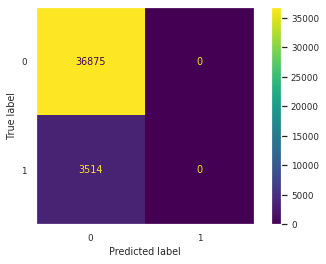

In [190]:
y_pred = clf.predict(X_test)

plt.rcParams["axes.grid"] = False
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


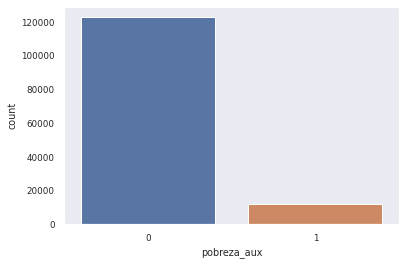

In [191]:
sns.countplot(data_mod['pobreza_aux'])
plt.show()

Al verificar las predicciones en la matriz de confusión, se identifica que el modelo está identificando erróneamente a los encuestados pobres. Esto se debe a que la base está desbalanceada, es decir, el 8.7% de los encuestados son pobres. Como consecuencia, si se crea un modelo que, independiente de los valores de entrada, responda que las personas no son pobres, automáticamente tiene un 91.3% de accuracy.  
  
Para evitar lo anterior, se procede a ajustar el set de entrenamiento mediante Random Over Sampler, para aumentar la cantidad de registros que corresponden a la clase con menor presencia, en este caso las personas "Pobres".  
  
### **Abordando el desbalance con SMOTE (Synthetic Minority Oversampling Technique)** ###
Específicamente se usa SMOTE (Synthetic Minority Oversampling Technique) para crear muestras "sintéticas" semejantes a las existentes de la clase minoritaria, evitando el overfitting si se usaran copias exactas de las muestras existentes.

In [192]:
#Se aplica SMOTE

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (171768, 51)
Shape of Y: (171768,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


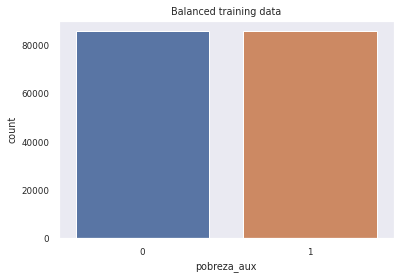

In [193]:
#Gráfico para verificar balance de las clases

sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [194]:
#Entrenamiento del modelo y Cross-Validation para obtener los indicadores
#Tarda menos de 2 mins en ejecutarse en Google Colab

clf = LogisticRegression().fit(X,Y)

recall_scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
accuracy_scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
precision_scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
f1_scores = cross_val_score(clf, X,Y, scoring='f1', cv=10)

print('Average Recall score: {}'.format(np.mean(recall_scores)))
print('Average Accuracy scores: {}'.format(np.mean(accuracy_scores)))
print('Average Precision scores: {}'.format(np.mean(precision_scores)))
print('Average F1 scores: {}'.format(np.mean(f1_scores)))

Average Recall score: 0.6394907525429104
Average Accuracy scores: 0.6667597686098972
Average Precision scores: 0.6765327486851763
Average F1 scores: 0.6573939085039984


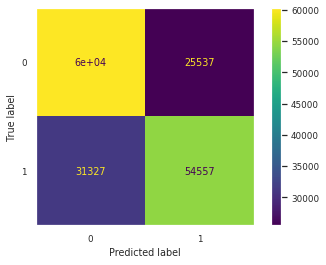

In [195]:
#Matriz de confusión para visualizar las clasificaciones que hace el modelo
#con los datos de entrenamiento

cm = confusion_matrix(Y, clf.predict(X), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Al chequear con Cross-Validation en el set de datos de entrenamientos, se obtienen los siguientes indicadores:  
<br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor promedio Cross-Validation</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.64</td>
            <td>El 64% de los casos positivos (Pobres) se estimaron bien</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.67</td>
            <td>El 67% de todos los casos (Pobres y No pobres) se estimaron bien</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.68</td>
            <td>El 68% de los casos estimados como positivos (Pobres), son realmente pobres</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.66</td>
            <td>La media armónica, es decir, un indicador equilibrado entre Precision y Recall obtenido por el modelo, es de un 66%.</td>
        </tr>
    </tbody>
</table>
<br>

In [196]:
#Obtención de los indicadores con el set de pruebas

test_preds = clf.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

Accuracy score: 0.6915496793681448
Recall score: 0.6303357996585088
Precision score: 0.16561985942874233
f1-score: 0.2623164377072477


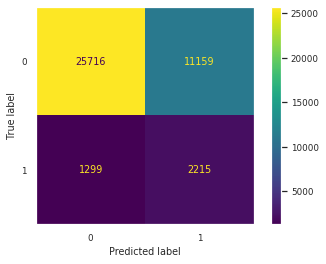

In [197]:
#Matriz de confusión para visualizar las clasificaciones que hace el modelo
#con los datos de prueba

cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Al chequear con los datos de prueba, se siguen obteniendo resultados semejantes en los indicadores de Recall y Accuracy, sin embargo, para bases de datos desbalanceadas el indicador más relevante (Precision) obtiene sólo 0,17. Esto quiere decir que el 17% de los resultados predichos por el modelo como "pobres" son realmente pobres, mientras que el 83% son no pobres clasificados como pobres. El F1-Score, se ve afectado por la baja en la precisión.  
  
#### **Acercando los indicadores obtenidos con Cross-Validation a los del testing set** ####  
Esta situación de la gran diferencia entre el valor de los indicadores al usar el set de pruebas se presenta por haber realizado la Cross-Validation después de hacer el "Over Sampling" con SMOTE. Para evitar que esto ocurra, se hará un "Over Sampling" para cada Cross-Validation, a fin de tener indicadores más parecidos entre el C-V y al usar el set de pruebas.

In [198]:
#Se usa Cross-Validation con 10 iteraciones
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

for train_index_ls, validation_index_ls in kf.split(X_train, y_train):
    # Se mantiene el set de validaciones aparte y se usa SMOTE para hacer over sampling en cada iteración
    train, validation = X_train.iloc[train_index_ls], X_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(train, target_train)
    print (X_train_res.shape, y_train_res.shape)

    # Se entrena el modelo en en cada "over sampled" de 9 folds
    clf = LogisticRegression().fit(X_train_res,y_train_res)

    # Testeo en 1 fold del validation set
    validation_preds = clf.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds))

print('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

(154592, 51) (154592,)
(154592, 51) (154592,)
(154592, 51) (154592,)
(154592, 51) (154592,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154592, 51) (154592,)
(154592, 51) (154592,)
Cross validated accuracy: 0.6830259766092681
Cross validated recall score: 0.638733919720368
Cross validated precision score: 0.16602638538261413
Cross validated f1_score: 0.26348919117931013


Se puede verificar que los indicadores obtenidos con Cross-Validation, aplicando SMOTE cada vez que se ejecutan permiten obtener indicadores representativos a los que se obtienen aplicando el set de pruebas.  
En este caso se obtiene un modelo que predice correctamente sólo al 64% de la población pobre, con el costo de incluir una gran cantidad de población no pobre en esta clase, es decir, que sólo el 17% de las personas que el modelo predice como Pobres son realmente pobres.  
  


Regresión Logística: f1=0.249 auc=0.147


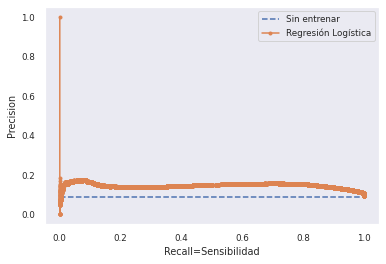

In [199]:
#Curva Precision-Recall

lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

yhat = clf.predict(X_test)
lr_precision, lr_recall, lr_threshold = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Recall=Sensibilidad')
plt.ylabel('Precision')

plt.legend()
plt.show()

Se aprecia un modelo con un comportamiento deficiente, cercano a un modelo sin entrenar.

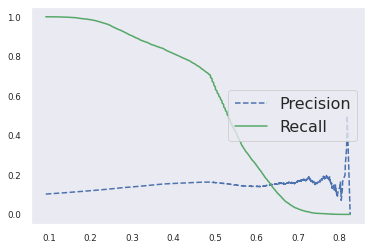

In [200]:
from sklearn.metrics import precision_recall_curve

lr_probs_t = clf.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, lr_probs_t[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Se aprecia un modelo que sí tiene la capacidad de predecir a la población pobre, pero con el costo de clasificar como pobres a una gran cantidad de población no pobre.

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.715


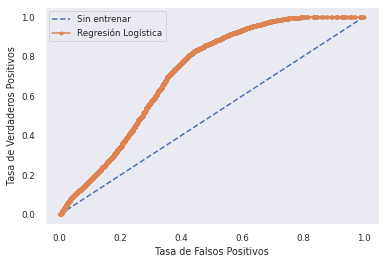

In [201]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades
lr_probs = clf.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

El modelo presenta una curva ROC alejada de lo que se espera de un modelo sin entrenar, sin embargo, en este estudio el Accuracy no es tan relevante como el Precision Score debido al desbalance que existe entre las clases.

### **Abordando el desbalance con Random Under Sampling** ###  
  
De acuerdo a los resultados obtenidos anteriormente, se decide hacer un nuevo approach para abordar el desbalance de los datos, que se identifica como el mayor factor que genera problemas al generar un modelo predictivo aceptable.  
  
Se usarán Random Under Sampling para reducir aleatoriamente la cantidad de registros de la clase mayoritaria, es decir, de los "No pobres" presentes en el set de datos con la finalidad de balancear las clases.

In [202]:
#Nueva lectura de los datos y generación de los sets de entrenamiento y prueba

X = data_reg_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


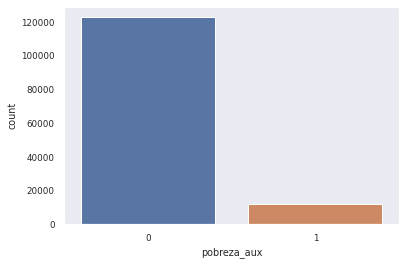

In [203]:
#Verificación del desbalance de las clases

sns.countplot(data_mod['pobreza_aux'])
plt.show()

In [204]:
#Se reduce la cantidad de casos No pobres para alcanzar un equilibrio con la población Pobre

rus = RandomUnderSampler(random_state=42, replacement=True)
X, Y = rus.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (16708, 51)
Shape of Y: (16708,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


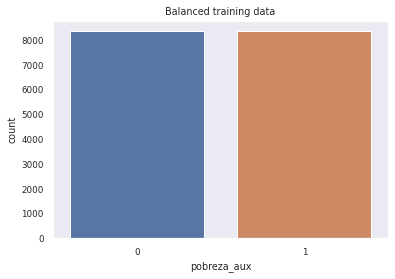

In [205]:
#Verificación del equilibrio de clases

sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

Con los resultados obtenidos en el modelo anterior, se decide realizar Cross-Validation con el Random Under Sampling para cada iteración.

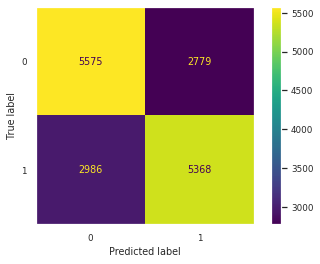

In [206]:
#Entrenamiento del modelo con los datos de entrenamiento y Matriz de confusión
clf = LogisticRegression().fit(X,Y)

cm = confusion_matrix(Y, clf.predict(X), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [207]:
#Se usa Cross-Validation con 10 iteraciones
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

for train_index_ls, validation_index_ls in kf.split(X_train, y_train):
    # Se mantiene el set de validaciones aparte y se usa RUS para hacer under sampling en cada iteración
    train, validation = X_train.iloc[train_index_ls], X_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    #Aplicación de Random Under Sampling
    rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy='majority')
    X_train_res, y_train_res = rus.fit_resample(train, target_train)
    print (X_train_res.shape, y_train_res.shape)

    # Se entrena el modelo en en cada "over sampled" de 9 folds
    clf = LogisticRegression().fit(X_train_res,y_train_res)

    # Testeo en 1 fold del validation set
    validation_preds = clf.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds))

print('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

(15036, 51) (15036,)
(15036, 51) (15036,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(15036, 51) (15036,)
(15036, 51) (15036,)
(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)
Cross validated accuracy: 0.7556808911998186
Cross validated recall score: 0.46427599346761017
Cross validated precision score: 0.12124330455647485
Cross validated f1_score: 0.1922462160217427


Comparando los indicadores obtenidos con Cross-Validation en este modelo con los del anterior, se identifica que por Precision y Recall el modelo generado con SMOTE es mejor que el con RUS (Random Under Sampling).

In [208]:
#Obtención de indicadores con el set de pruebas

test_preds = clf.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

Accuracy score: 0.6672361286488896
Recall score: 0.6357427433124644
Precision score: 0.15520355703765457
f1-score: 0.2494974313156131


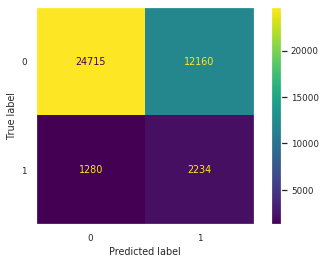

In [209]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Se puede verificar que los indicadores obtenidos con modelo generado aplicando RUS predice correctamente sólo al 64% de la población pobre, igual que el modelo aplicando SMOTE, pero con el costo de incluir una cantidad mayor de población no pobre en esta clase, es decir, que sólo el 16% de las personas que el modelo predice como Pobres son realmente pobres. Esto hace que también baje el Accuracy.  
  
De acuerdo a los resultados obtenidos, se interpretan los indicadores obtenidos con el set de pruebas:  
<br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor obtenido con<br> set de pruebas</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.64</td>
            <td>El 64% de los casos positivos (Pobres) se estimaron bien</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.67</td>
            <td>El 67% de todos los casos (Pobres y No pobres) se estimaron bien</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.16</td>
            <td>El 16% de los casos estimados como positivos (Pobres), son realmente pobres</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.25</td>
            <td>La media armónica, es decir, un indicador equilibrado entre Precision y Recall obtenido por el modelo, es de un 25%.</td>
        </tr>
    </tbody>
</table>
<br>

Regresión Logística: f1=0.249 auc=0.147


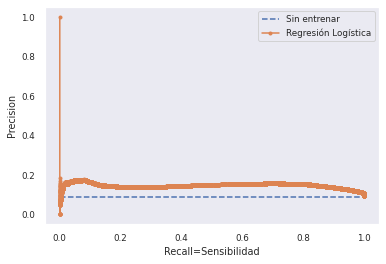

In [210]:
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

yhat = clf.predict(X_test)
lr_precision, lr_recall, lr_threshold = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Recall=Sensibilidad')
plt.ylabel('Precision')

plt.legend()
plt.show()

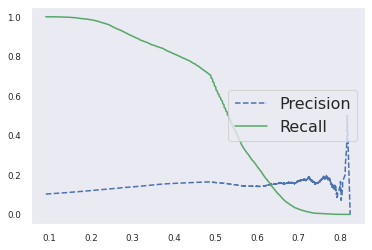

In [211]:
from sklearn.metrics import precision_recall_curve

lr_probs_t = clf.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, lr_probs_t[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.716


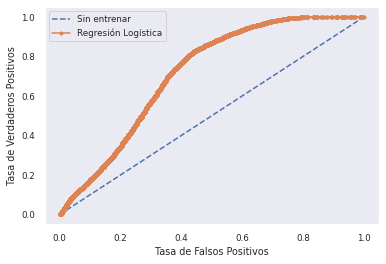

In [212]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades
lr_probs = clf.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

### **Conclusiones Regresión Logística** ##  
  
Para el caso de estudio se generaron modelos de regresión logística con la intención de predecir la clasificación de las personas encuestadas en "Pobres" y "No pobres".  
  
El primer modelo obtuvo con el set de pruebas un indicador Accuracy de 0.91, lo que indica que el modelo es capaz de predecir el 91% de los casos de forma correcta. Sin embargo, al graficar la matriz de confusión se identificó que el modelo estaba clasificando todos los casos como "No pobres". Situación que se explica por el desbalance que existe entre los registros "No pobres" y "Pobres" que existe en el la base. Debido a esto se usó el indicador Precision para determinar si se está cumpliendo el objetivo de clasificar la clase minoritaria de forma correcta.  
  
Para abordar el desbalance se utilizaron dos métodos, lo que definieron la creación de los dos modelos. En el primer caso se usó "Synthetic Minority Oversampling Technique" (SMOTE) que crea registros "sintéticos", es decir, muy parecidos a los de la clase minoritaria, para balancear ambas clases, en este caso "Pobres" y "No pobres".  En el segundo caso se usó "Random Under Sampling" (RES) para eliminar aleatoriamente registros de la clase mayoritaria para balancear las clases.  
  
El primer modelo obtiene un Accuracy de 0.69, Recall de 0.63 y Precision de 0.17. Estos indicadores dicen que el 69% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 63% está bien clasificado por el modelo. De todos los casos que el modelo identifica como pobres, el 17% está bien clasificado, es decir, el 83% de las predicciones que el modelo indica ser pobres, no lo son.  
  
Para el segundo modelo se obtiene un Accuracy de 0.67, Recall de 0.64 y Precision de 0.16. Estos indicadores dicen que el 67% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 64% está bien clasificado por el modelo. Y de todos los casos que el modelo identifica como pobres, el 16% está bien clasificado, es decir, el 84% de las predicciones que el modelo indica ser pobres, no lo son.  
<br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor set pruebas<br>desbalance ajustado<br>usando SMOTE</th>
            <th>Valor set pruebas<br>desbalance ajustado<br>usando RUS</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.64</td>
            <td>0.64</td>
            <td>Con SMOTE y RUS el 64% de los casos positivos (Pobres) se estimaron bien.</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.68</td>
            <td>0.67</td>
            <td>Con SMOTE el 68% de todos los casos (Pobres y No pobres) se estimaron bien, con RUS el 67%.</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.17</td>
            <td>0.16</td>
            <td>Con SMOTE 17% de los casos estimados como positivos (Pobres), son realmente pobres, con RUS el 16%.</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.26</td>
            <td>0.25</td>
            <td>Con SMOTE la media armónica, es decir, un indicador equilibrado entre Precision y Recall obtenido por el modelo, es de un 26%, con RUS un 25%.</td>
        </tr>
    </tbody>
</table>
<br>

Se concluye que el primer modelo generado usando SMOTE es mejor, pero por poca diferencia.  
Se concluye que se deben generar modelos usando otras técnicas de machine learning para abordar el caso estudio.

# **ÁRBOL DE DECISIONES** #  
  
Se usará árboles de decisión para predecir la clasificación de los encuestados según su nivel de pobreza, caracterizados como "No pobres" y "Pobres".

In [213]:
# Datos de entrenamiento y test a partir de la base

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image 

data_tree = data_mod.drop(["pobreza","esc","ytot_puntaje_z","folio","sexo","ecivil","esc","activ","indmat","indsan","hacinamiento","pobreza_aux"], axis='columns', inplace=False)
data_tree_dic = pd.get_dummies(data_tree, drop_first=True)
etiquetas = list(data_tree_dic.columns)
X = data_tree_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [214]:
#Entrenamiento del modelo con los datos de entrenamiento
#Se utiliza una profundidad máxima del árbol de 10 para evitar uso excesivo de recursos

model = DecisionTreeClassifier(random_state=50, max_depth=10).fit(X_train,y_train)

In [215]:
#Evaluación del modelo con datos de entrenamiento

y_preds = model.predict(X_train)

print('Accuracy score: {}'.format(accuracy_score(y_train, y_preds)))

Accuracy score: 0.9159468579553895


Accuracy score: 0.9103963950580604
Recall score: 0.03898690950483779
Precision score: 0.36147757255936674
f1-score: 0.07038273824813768


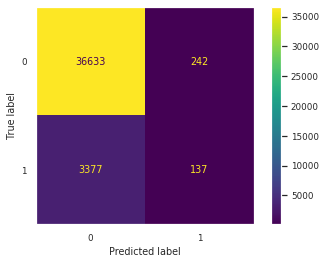

In [216]:
#Evaluación del modelo con datos de prueba

test_preds = model.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


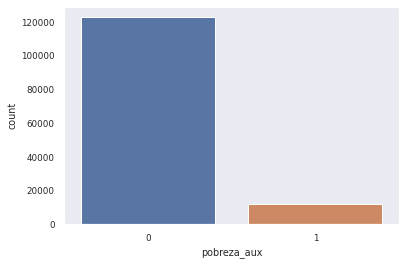

In [217]:
#Verificación del desbalance de las clases

sns.countplot(data_mod['pobreza_aux'])
plt.show()

Se observa que el modelo generado con árboles de decisión se ve igualmente afectado que los generados con regresión logística, obteniendo buenos resultados en Accuracy (sobre 0.90), pero malos indicadores de Precision (0,36) y Recall (0.04). Esto indica que el modelo está siendo afectado de forma considerable por el desbalance de clases.  

Se balancearán las clases con RUS y SMOTE, ya que se desconoce el comportamiento de los modelos de Árboles de Decisión.  

### **Abordando el problema de desbalance con Random Under Sampling (RUS)** ###

In [218]:
#Se reduce la cantidad de casos No pobres para alcanzar un equilibrio con la población Pobre usando Random Under Sampler

rus = RandomUnderSampler(random_state=42, replacement=True)
X, Y = rus.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (16708, 51)
Shape of Y: (16708,)


In [219]:
#Entrenamiento del modelo con datos reducidos (aplicando RUS) y manteniendo una profundidad máxima de 10
model = DecisionTreeClassifier(max_depth=10 ,random_state=50).fit(X,Y)

In [220]:
#Prueba del modelo con datos de entrenamiento

y_preds = model.predict(X)

print('Accuracy score: {}'.format(accuracy_score(Y, y_preds)))
print('Recall score: {}'.format(recall_score(Y, y_preds)))
print('Precision score: {}'.format(precision_score(Y, y_preds)))
print('f1-score: {}'.format(f1_score(Y, y_preds)))

Accuracy score: 0.7902801053387599
Recall score: 0.8532439549916208
Precision score: 0.7578141611737189
f1-score: 0.8027027027027027


Accuracy score: 0.6787491643764392
Recall score: 0.7993739328400683
Precision score: 0.186285562703097
f1-score: 0.3021567256494379


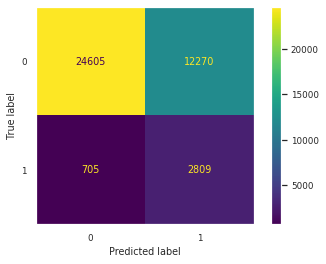

In [221]:
#Prueba del modelo con datos de prueba

y_preds = model.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, y_preds)))
print('Recall score: {}'.format(recall_score(y_test, y_preds)))
print('Precision score: {}'.format(precision_score(y_test, y_preds)))
print('f1-score: {}'.format(f1_score(y_test, y_preds)))

cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Se verifica que efectivamente existe una mejora en el modelo. Habiendo realizado esto se usa el parámetro "Cost Complexity Prunning Alpha" (CCP_Alpha) para podar el árbol generado.

In [222]:
X, Y = rus.fit_resample(X_train, y_train, )
print ('Shape of undersampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))
model = DecisionTreeClassifier(max_depth=10 ,random_state=50).fit(X,Y)
model = DecisionTreeClassifier(max_depth=10, random_state=50).cost_complexity_pruning_path(X, Y)
ccp_alphas, impurities = model.ccp_alphas, model.impurities

Shape of undersampled data: (16708, 51)
Shape of Y: (16708,)


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

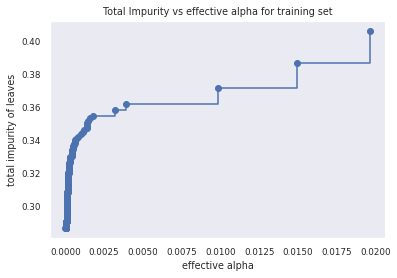

In [223]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [224]:
#Generación de distintos modelos
#Tarda 16 segundos en ejecutarse

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha, max_depth=10)
    clf.fit(X, Y)
    clfs.append(clf)

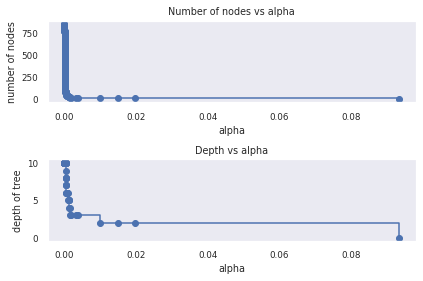

In [225]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Mejor modelo según Accuracy**

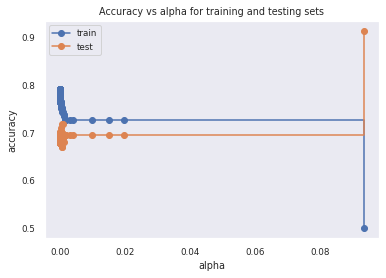

In [226]:
train_scores = [clf.score(X, Y) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [227]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X, Y))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

Training accuracy of best model:  0.5
Test accuracy of best model:  0.9129961128029909


Accuracy score: 0.9129961128029909
Recall score: 0.0
Precision score: 0.0
f1-score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


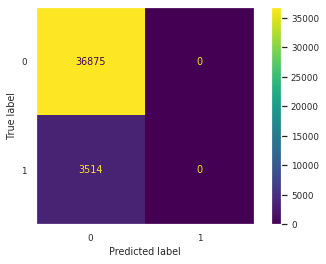

In [228]:
test_preds = best_model.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Accuracy clasifica erróneamente a toda la población pobre. Esto es esperable por el mencionado desbalance de las clases.  
<br>
**Mejor modelo según Precision**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


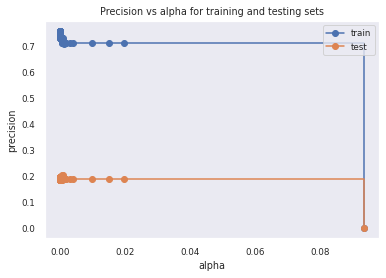

In [229]:
train_scores_prec_rus = [precision_score(Y, clf.predict(X)) for clf in clfs]
test_scores_prec_rus = [precision_score(y_test, clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores_prec_rus, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores_prec_rus, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [230]:
index_best_model_prec_rus = np.argmax(test_scores_prec_rus)
best_model_prec_rus = clfs[index_best_model_prec_rus]
print('Training precision of best model: ',precision_score(Y, best_model_prec_rus.predict(X)))
print('Test precision of best model: ',precision_score(y_test, best_model_prec_rus.predict(X_test)))

Training precision of best model:  0.7303904923599321
Test precision of best model:  0.203891518293141


Accuracy score: 0.7178192082002526
Recall score: 0.7723392145702903
Precision score: 0.203891518293141
f1-score: 0.3226151560178306


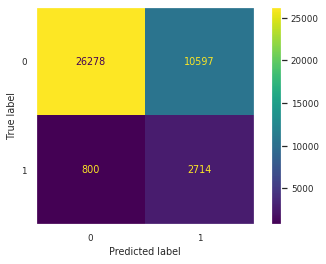

In [231]:
test_preds = best_model_prec_rus.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Precision predice de mejor forma a la población Pobre, con el costo de clasificar una gran cantidad de personas no pobres como pobres. Este modelo representa una mejora respecto al generado con Regresión Logística.   
<br>
**Mejor modelo según Recall**

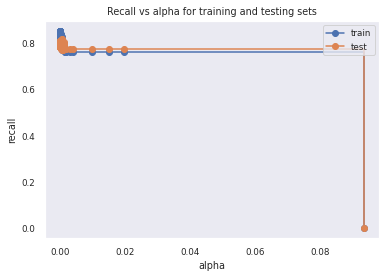

In [232]:
train_scores_rec = [recall_score(Y, clf.predict(X)) for clf in clfs]
test_scores_rec = [recall_score(y_test, clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores_rec, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores_rec, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [233]:
index_best_model_rec = np.argmax(test_scores_rec)
best_model_rec = clfs[index_best_model_rec]
print('Training recall of best model: ',recall_score(Y, best_model_rec.predict(X)))
print('Test recall of best model: ',recall_score(y_test, best_model_rec.predict(X_test)))

Training recall of best model:  0.8270289681589658
Test recall of best model:  0.8170176437108708


Accuracy score: 0.6703805491594246
Recall score: 0.8170176437108708
Precision score: 0.18473714690174378
f1-score: 0.30133823143531885


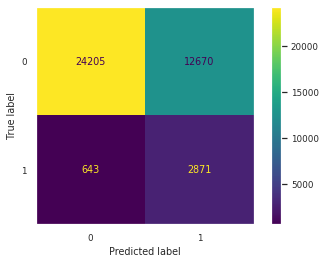

In [234]:
test_preds = best_model_rec.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Recall predice de mejor forma a la población Pobre respecto al modelo con mejor Precision. Sin embargo el costo de clasificar personas no pobres como pobres aumenta en este caso.

### **Abordando el desbalance con Synthetic Minority Oversampling Technique (SMOTE)** ###

In [235]:
#Nueva lectura de los datos y generación de los sets de entrenamiento y prueba

X = data_reg_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [236]:
#Se aplica SMOTE

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (171768, 51)
Shape of Y: (171768,)


In [237]:
#Entrenamiento del modelo con datos reducidos (aplicando RUS) y manteniendo una profundidad máxima de 10
model = DecisionTreeClassifier(max_depth=10 ,random_state=50).fit(X,Y)

In [238]:
#Prueba del modelo con datos de entrenamiento

y_preds = model.predict(X)

print('Accuracy score: {}'.format(accuracy_score(Y, y_preds)))
print('Recall score: {}'.format(recall_score(Y, y_preds)))
print('Precision score: {}'.format(precision_score(Y, y_preds)))
print('f1-score: {}'.format(f1_score(Y, y_preds)))

Accuracy score: 0.857272600251502
Recall score: 0.8760304596898142
Precision score: 0.8443539155612416
f1-score: 0.8599005657466142


Accuracy score: 0.8072742578424819
Recall score: 0.5395560614684121
Precision score: 0.23517737534110641
f1-score: 0.3275742916378715


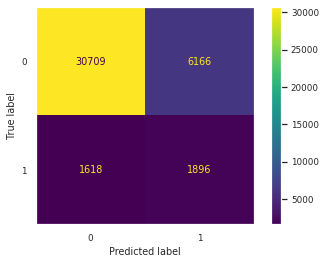

In [239]:
#Prueba del modelo con datos de prueba

y_preds = model.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, y_preds)))
print('Recall score: {}'.format(recall_score(y_test, y_preds)))
print('Precision score: {}'.format(precision_score(y_test, y_preds)))
print('f1-score: {}'.format(f1_score(y_test, y_preds)))

cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Se verifica que efectivamente existe una mejora en el modelo. Habiendo realizado esto se usa el parámetro "Cost Complexity Prunning Alpha" (CCP_Alpha) para podar el árbol generado.

In [240]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_train, y_train, )
#X, Y = rus.fit_resample(X_train, y_train, )
print ('Shape of undersampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))
model = DecisionTreeClassifier(max_depth=10 ,random_state=50).fit(X,Y)
model = DecisionTreeClassifier(max_depth=10, random_state=50).cost_complexity_pruning_path(X, Y)
ccp_alphas, impurities = model.ccp_alphas, model.impurities

Shape of undersampled data: (171768, 51)
Shape of Y: (171768,)


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

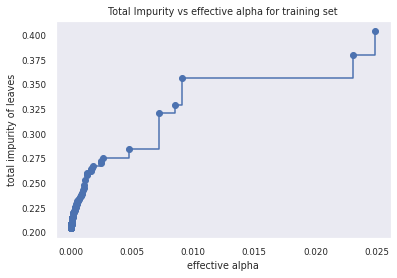

In [241]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [242]:
#Generación de distintos modelos
#Tarda menos de 6 minutos en ejecutarse

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha, max_depth=10)
    clf.fit(X, Y)
    clfs.append(clf)

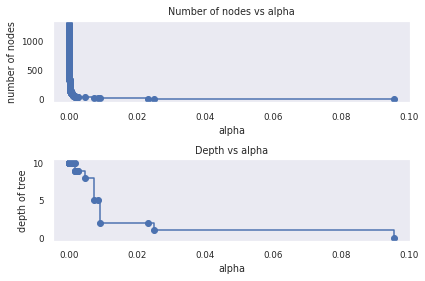

In [243]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Mejor modelo según Accuracy**

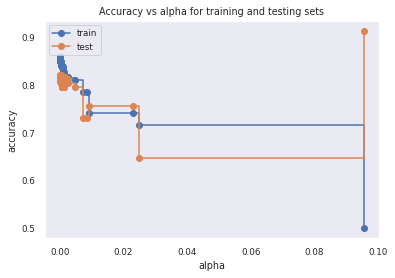

In [244]:
train_scores = [clf.score(X, Y) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [245]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X, Y))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

Training accuracy of best model:  0.5
Test accuracy of best model:  0.9129961128029909


Accuracy score: 0.9129961128029909
Recall score: 0.0
Precision score: 0.0
f1-score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


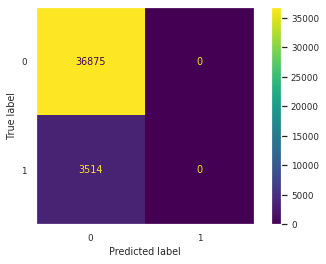

In [246]:
test_preds = best_model.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Accuracy clasifica erróneamente a toda la población pobre. Esto es esperable por el mencionado desbalance de las clases.  
<br>
**Mejor modelo según Precision**

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


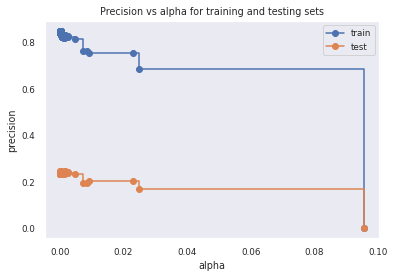

In [247]:
train_scores_prec = [precision_score(Y, clf.predict(X)) for clf in clfs]
test_scores_prec = [precision_score(y_test, clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores_prec, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores_prec, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [248]:
index_best_model_prec = np.argmax(test_scores_prec)
best_model_prec = clfs[index_best_model_prec]
print('Training precision of best model: ',precision_score(Y, best_model_prec.predict(X)))
print('Test precision of best model: ',precision_score(y_test, best_model_prec.predict(X_test)))

Training precision of best model:  0.8343043096723869
Test precision of best model:  0.2475958456212335


Accuracy score: 0.8155190769764045
Recall score: 0.5495162208309619
Precision score: 0.2475958456212335
f1-score: 0.3413771766993724


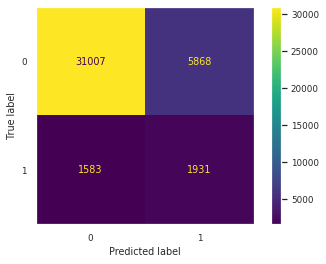

In [249]:
test_preds = best_model_prec.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Precision predice de mejor forma a la población Pobre, con el costo de clasificar una gran cantidad de personas no pobres como pobres. Este modelo representa una mejora respecto al generado con Regresión Logística.  
<br>
**Mejor modelo según Recall**

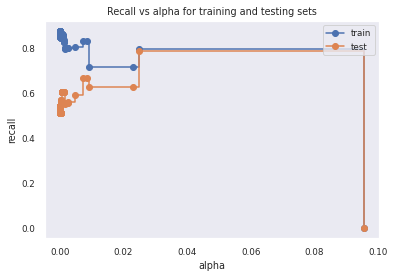

In [250]:
train_scores_rec = [recall_score(Y, clf.predict(X)) for clf in clfs]
test_scores_rec = [recall_score(y_test, clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores_rec, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores_rec, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [251]:
index_best_model_rec = np.argmax(test_scores_rec)
best_model_rec = clfs[index_best_model_rec]
print('Training recall of best model: ',recall_score(Y, best_model_rec.predict(X)))
print('Test recall of best model: ',recall_score(y_test, best_model_rec.predict(X_test)))

Training recall of best model:  0.7949326999208234
Test recall of best model:  0.78628343767786


Accuracy score: 0.6468840525885761
Recall score: 0.78628343767786
Precision score: 0.16978001720535824
f1-score: 0.2792601576713159


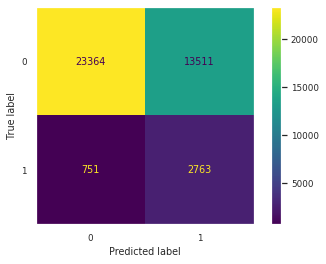

In [252]:
test_preds = best_model_rec.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Se puede observar que el modelo con mejor Recall predice de mejor forma a la población Pobre respecto al modelo con mejor Precision. Sin embargo el costo de clasificar personas no pobres como pobres aumenta en este caso.

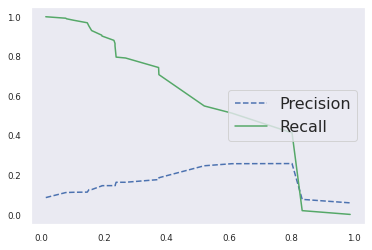

In [253]:
#Gráfico Precision-Recall mejor modelo según Precision con RUS

lr_probs_t = best_model_prec.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_probs_t[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

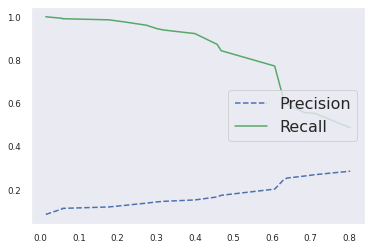

In [254]:
#Gráfico Precision-Recall mejor modelo según precisión con SMOTE

lr_probs_t = best_model_prec_rus.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_probs_t[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

<br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor set pruebas<br>modelo sin ajuste<br>de desbalance</th>
            <th>Valor set pruebas<br>mejor modelo según<br> Precision usando RUS</th>
            <th>Valor set pruebas<br>mejor modelo según<br> Precision usando SMOTE</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.04</td>
            <td>0.77</td>
            <td>0.55</td>
            <td>Con RUS el 77% de los casos positivos (Pobres) se estimaron bien, con SMOTE el 55%.</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.91</td>
            <td>0.72</td>
            <td>0.82</td>
            <td>Con RUS el 72% de todos los casos (Pobres y No pobres) se estimaron bien, con SMOTE el 82%.</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.36</td>
            <td>0.20</td>
            <td>0.25</td>
            <td>Con RUS el 20% de los casos estimados como positivos (Pobres), son realmente pobres, con SMOTE el 25%.</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.07</td>
            <td>0.32</td>
            <td>0.34</td>
            <td>Con RUS La media armónica, es decir, un indicador equilibrado entre Precision y Recall es de un 32%, con SMOTE un 34%.</td>
        </tr>
    </tbody>
</table>
<br>

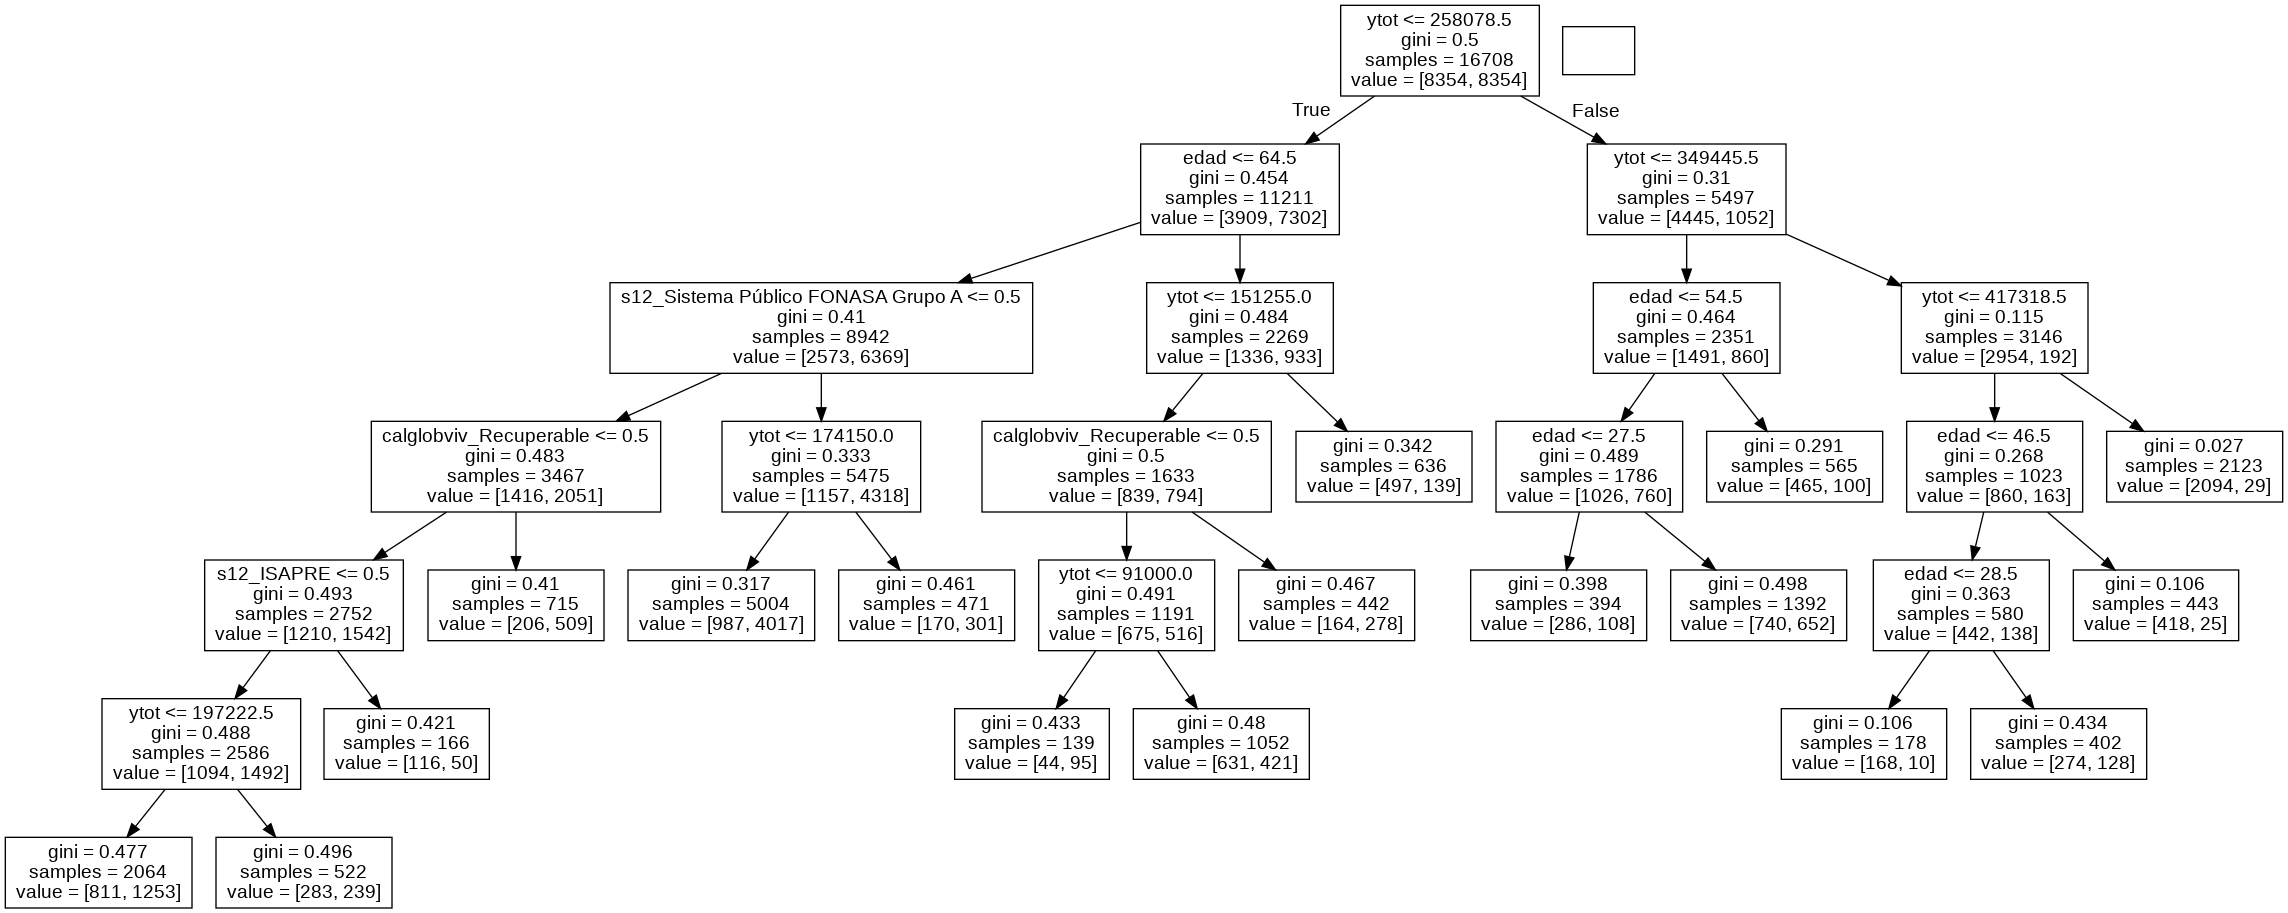

In [255]:
#Gráfico del mejor modelo según Precision usando RUS

dot_data = export_graphviz(best_model_prec_rus, feature_names=etiquetas)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

### **Conclusiones Árbol de Decisiones** ##  
  
Para el caso de estudio se generaron  modelos de Árbol de Decisiones con la intención de predecir la clasificación de las personas encuestadas en "Pobres" y "No pobres".  
  
El primer modelo obtuvo con el set de pruebas un indicador Accuracy de 0.91, lo que indica que el modelo es capaz de predecir el 91% de los casos de forma correcta. Sin embargo, al graficar la matriz de confusión se identificó que el modelo estaba clasificando casi todo los casos como "No pobres". Situación similar a la que afecta al primer modelo de Regresión Logística y que se explica por el desbalance entre las clases. Por esto se usaron los indicadores Precision y Recall para determinar si se está cumpliendo el objetivo de clasificar la clase minoritaria de forma correcta.  
  
Para abordar el desbalance se utilizaron dos métodos que definieron la creación de dos modelos. En el primer caso se usó "Random Under Sampling" (RES) para eliminar aleatoriamente registros de la clase mayoritaria para balancear las clases. En el segundo caso se usó "Synthetic Minority Oversampling Technique" (SMOTE) que crea registros "sintéticos" de la clase minoritaria.  

En el primer modelo se obtiene un Accuracy de 0.72, Recall de 0.77 y Precision de 0.20. Estos indicadores dicen que el 72% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 77% está bien clasificado por el modelo. Y de todos los casos que el modelo identifica como pobres, el 20% está bien clasificado, es decir, el 80% de las predicciones que el modelo indica ser pobres, no lo son.
  
Para el segundo modelo obtiene un Accuracy de 0.82, Recall de 0.55 y Precision de 0.25. Estos indicadores dicen que el 82% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 55% está bien clasificado por el modelo. De todos los casos que el modelo identifica como pobres, el 25% está bien clasificado, es decir, el 75% de las predicciones que el modelo indica ser pobres, no lo son.  
  <br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor set pruebas<br>modelo sin ajuste<br>de desbalance</th>
            <th>Valor set pruebas<br>mejor modelo según<br> Precision usando RUS</th>
            <th>Valor set pruebas<br>mejor modelo según<br> Precision usando SMOTE</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.04</td>
            <td>0.77</td>
            <td>0.55</td>
            <td>Con RUS el 77% de los casos positivos (Pobres) se estimaron bien, con SMOTE el 55%.</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.91</td>
            <td>0.72</td>
            <td>0.82</td>
            <td>Con RUS el 72% de todos los casos (Pobres y No pobres) se estimaron bien, con SMOTE el 82%.</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.36</td>
            <td>0.20</td>
            <td>0.25</td>
            <td>Con RUS el 20% de los casos estimados como positivos (Pobres), son realmente pobres, con SMOTE el 25%.</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.07</td>
            <td>0.32</td>
            <td>0.34</td>
            <td>Con RUS La media armónica, es decir, un indicador equilibrado entre Precision y Recall es de un 32%, con SMOTE un 34%.</td>
        </tr>
    </tbody>
</table>
<br>

Se concluye que ambos modelos generados usando RUS y SMOTE son mejores que el modelo generado sin hacer balance de clases.  
Se concluye que ambos modelos deben continuar siendo mejorados, ya que ambos presentan un indicador de Precision bajo, clasificando muchas personas que no son pobres como si lo fueran.  
En el supuesto caso de que uno de estos modelos debieran ser aplicados, se concluye que el caso aplicando RUS es mejor ya que aumenta en un 22% (Recall) la población pobre correctamente clasificada. Sin embargo, esto implica un mayor costo en recursos públicos porque sólo el 20% (Precision) de aquellas personas clasificadas como pobres realmente lo son.

# **NAIVE BAYES** #  

Se usará Naive Bayes con clasificación binomial, para predecir la clase de los encuestados según su nivel de pobreza, caracterizados como "No pobres" y "Pobres".

In [256]:
from sklearn.naive_bayes import BernoulliNB

data_naive = data_mod.drop(["pobreza","esc","ytot_puntaje_z","folio","sexo","ecivil","esc","activ","indmat","indsan","hacinamiento","pobreza_aux"], axis='columns', inplace=False)
data_naive_dic = pd.get_dummies(data_naive, drop_first=True)
etiquetas = list(data_naive_dic.columns)
X = data_naive_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [257]:
#Entrenamiento del modelo

bnb = BernoulliNB().fit(X_train, y_train)

In [258]:
#Indicadores del modelo con el set de entrenamiento

y_preds = bnb.predict(X_train)

print('Accuracy score: {}'.format(accuracy_score(y_train, y_preds)))
print('Recall score: {}'.format(recall_score(y_train, y_preds)))
print('Precision score: {}'.format(precision_score(y_train, y_preds)))
print('f1-score: {}'.format(f1_score(y_train, y_preds)))

Accuracy score: 0.8417305121076424
Recall score: 0.38017716064160884
Precision score: 0.2459536900797646
f1-score: 0.2986787040955471


Average Recall score: 0.3800528607856058
Average Accuracy scores: 0.8416774006165962
Average Precision scores: 0.2458876291942224
Average F1 scores: 0.2985549262935206


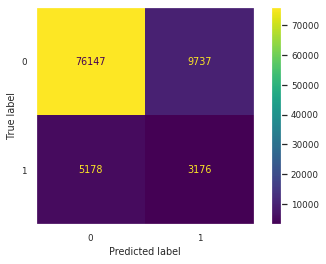

In [259]:
#Entrenamiento del modelo y Cross-Validation para obtener los indicadores

recall_scores = cross_val_score(bnb, X_train, y_train, scoring='recall', cv=10)
accuracy_scores = cross_val_score(bnb, X_train, y_train, scoring='accuracy', cv=10)
precision_scores = cross_val_score(bnb, X_train, y_train, scoring='precision', cv=10)
f1_scores = cross_val_score(bnb, X_train,y_train, scoring='f1', cv=10)

print('Average Recall score: {}'.format(np.mean(recall_scores)))
print('Average Accuracy scores: {}'.format(np.mean(accuracy_scores)))
print('Average Precision scores: {}'.format(np.mean(precision_scores)))
print('Average F1 scores: {}'.format(np.mean(f1_scores)))

cm = confusion_matrix(y_train, bnb.predict(X_train), labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Accuracy score: 0.8421847532744065
Recall score: 0.3790552077404667
Precision score: 0.24112961622013035
f1-score: 0.2947554768754149


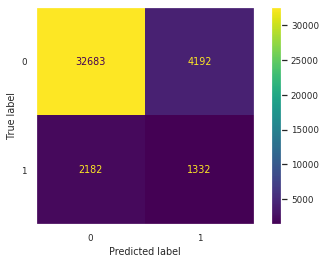

In [260]:
#Evaluación del modelo con set de prueba

test_preds = bnb.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Usando Cross-Validation y sin ajustes por balance de clases se obtienen los valores de los indicadores:
*  Accuracy: 0.84
*  Recall: 0.38
*  Precision: 0.24
*  F1-Score: 0.29  

Aplicando Naive Bayer sin hacer modificaciones para balancear las clases, se obtiene un modelo que se comporta diferente a los anteriores de Regresión Logística y Árbol de Decisión, ya que se obtienen clasificaciones correctas para casos de personas pobres.  
  
Para explorar mejoras en el modelo se usarán nuevamente las técnicas de balace de clases RUS y SMOTE.

### **Aplicación de RUS para balancear las clases** ###

In [261]:
#Nueva lectura de los datos y generación de los sets de entrenamiento y prueba

X = data_reg_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [262]:
#Se reduce la cantidad de casos No pobres para alcanzar un equilibrio con la población Pobre

rus = RandomUnderSampler(random_state=42, replacement=True)
X, Y = rus.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (16708, 51)
Shape of Y: (16708,)


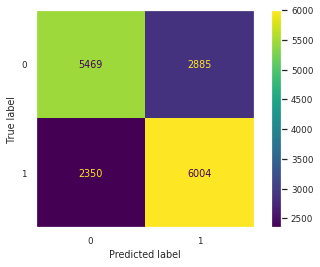

In [263]:
#Entrenamiento del modelo con datos RUS
bnb = BernoulliNB().fit(X, Y)

#Matriz de confusión con datos de entrenamientos
cm = confusion_matrix(Y, bnb.predict(X), labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()
plt.show()

In [264]:
#Se usa Cross-Validation con 10 iteraciones
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

for train_index_ls, validation_index_ls in kf.split(X_train, y_train):
    # Se mantiene el set de validaciones aparte y se usa RUS para hacer under sampling en cada iteración
    train, validation = X_train.iloc[train_index_ls], X_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    #Aplicación de Random Under Sampling
    rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy='majority')
    X_train_res, y_train_res = rus.fit_resample(train, target_train)
    print (X_train_res.shape, y_train_res.shape)

    # Se entrena el modelo en en cada "under sampling" de 9 folds
    bnb = BernoulliNB().fit(X_train_res, y_train_res)

    # Testeo en 1 fold del validation set
    validation_preds = bnb.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds))

print('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

(15036, 51) (15036,)
(15036, 51) (15036,)
(15036, 51) (15036,)
(15036, 51) (15036,)
(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)
(15038, 51) (15038,)
Cross validated accuracy: 0.662514018772836
Cross validated recall score: 0.7164233733489958
Cross validated precision score: 0.16906016614890146
Cross validated f1_score: 0.273528597453596


Accuracy score: 0.6649087622867612
Recall score: 0.7128628343767786
Precision score: 0.16666666666666666
f1-score: 0.27016824849007764


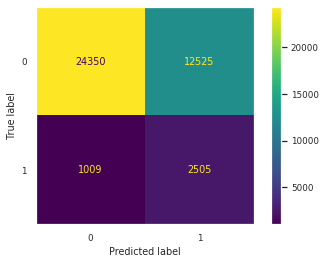

In [265]:
#Obtención de resultados aplicando set de prueba

bnb = BernoulliNB().fit(X, Y)

test_preds = bnb.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()
plt.show()

Usando Cross-Validation y RUS se obtienen los valores de los indicadores:
*  Accuracy: 0.66
*  Recall: 0.71
*  Precision: 0.17
*  F1-Score: 0.27

### **Aplicación de SMOTE para balancear las clases** ###

In [266]:
#Nueva lectura de los datos y generación de los sets de entrenamiento y prueba

X = data_reg_dic[etiquetas]
y = data_mod["pobreza_aux"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [267]:
#Se aplica SMOTE

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_train, y_train, )
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (171768, 51)
Shape of Y: (171768,)


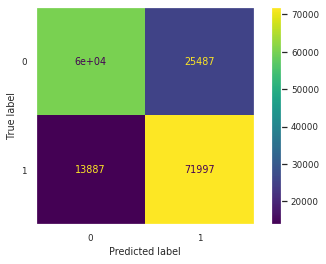

In [268]:
#Entrenamiento del modelo con datos SMOTE
bnb = BernoulliNB().fit(X, Y)

#Matriz de confusión con datos de entrenamientos
cm = confusion_matrix(Y, bnb.predict(X), labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()
plt.show()

In [269]:
#Se usa Cross-Validation con 10 iteraciones
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

for train_index_ls, validation_index_ls in kf.split(X_train, y_train):
    # Se mantiene el set de validaciones aparte y se usa SMOTE para hacer over sampling en cada iteración
    train, validation = X_train.iloc[train_index_ls], X_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(train, target_train)
    print (X_train_res.shape, y_train_res.shape)

    # Se entrena el modelo en en cada "over sampled" de 9 folds
    bnb = BernoulliNB().fit(X_train_res, y_train_res)

    # Testeo en 1 fold del validation set
    validation_preds = bnb.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds))

print('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

(154592, 51) (154592,)
(154592, 51) (154592,)
(154592, 51) (154592,)
(154592, 51) (154592,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154590, 51) (154590,)
(154592, 51) (154592,)
(154592, 51) (154592,)
Cross validated accuracy: 0.6978925197837101
Cross validated recall score: 0.6195849926940378
Cross validated precision score: 0.16989624945640036
Cross validated f1_score: 0.26666018546313885


Accuracy score: 0.6965262819084405
Recall score: 0.6143995446784292
Precision score: 0.16530127861572622
f1-score: 0.26051282051282054


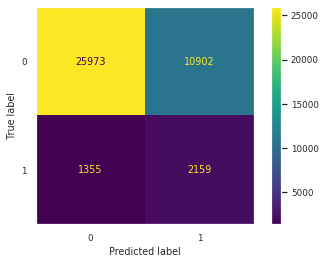

In [270]:
#Se evalúa el modelo con el set de pruebas

bnb = BernoulliNB().fit(X, Y)

test_preds = bnb.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall score: {}'.format(recall_score(y_test, test_preds)))
print('Precision score: {}'.format(precision_score(y_test, test_preds)))
print('f1-score: {}'.format(f1_score(y_test, test_preds)))

cm = confusion_matrix(y_test, test_preds, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()
plt.show()

Usando Cross-Validation y SMOTE se obtienen los valores de los indicadores:
*  Accuracy: 0.70
*  Recall: 0.61
*  Precision: 0.17
*  F1-Score: 0.26

### **Conclusiones Naive Bayes** ##  
  
Para el caso de estudio se generaron modelos de Naive Bayes con clasificador binario a fin de predecir la clasificación de las personas encuestadas en "Pobres" y "No pobres".  
  
El primer modelo obtuvo con el set de pruebas un indicador Accuracy de 0.84, Recall de 0.38 y Precision de 0.24. Estos indicadores dicen que el 84% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 38% está bien clasificado por el modelo. Y de todos los casos que el modelo identifica como pobres, el 24% está bien clasificado, es decir, el 76% de las predicciones que el modelo indica ser pobres, no lo son.  
  
Para intentar mejorar el rendimiento del modelo se abordó el desbalance de clases con RUS y SMOTE.  

En el primer modelo (RUS) se obtiene un Accuracy de 0.66, Recall de 0.71 y Precision de 0.17. Estos indicadores dicen que el 66% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 71% está bien clasificado por el modelo. Y de todos los casos que el modelo identifica como pobres, el 17% está bien clasificado, es decir, el 83% de las predicciones que el modelo indica ser pobres, no lo son.
  
Para el segundo modelo (SMOTE) se obtiene un Accuracy de 0.70, Recall de 0.61 y Precision de 0.17. Estos indicadores dicen que el 70% de los casos son correctamente clasificados, tanto en la clase "Pobres" como "No pobres". Del total de personas pobres, el 61% está bien clasificado por el modelo. De todos los casos que el modelo identifica como pobres, el 17% está bien clasificado, es decir, el 83% de las predicciones que el modelo indica ser pobres, no lo son.  
  <br>
<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Valor set pruebas<br>modelo sin ajuste<br>de desbalance</th>
            <th>Valor set pruebas<br>desbalance ajustado<br> usando RUS</th>
            <th>Valor set pruebas<br>desbalance ajustado<br> usando SMOTE</th>
            <th>Interpretación</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.38</td>
            <td>0.71</td>
            <td>0.61</td>
            <td>Sin ajuste el 38% de los casos positivos (Pobres) se estimaron bien, con RUS el 71% y con SMOTE el 61%.</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.84</td>
            <td>0.66</td>
            <td>0.70</td>
            <td>Sin ajuste el 84% de todos los casos (Pobres y No pobres) se estimaron bien, con RUS el 66% y con SMOTE el 70%.</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.24</td>
            <td>0.17</td>
            <td>0.17</td>
            <td>Sin ajuste el 24% de los casos estimados como positivos (Pobres) son realmente pobres, con RUS y SMOTE el 17%.</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.29</td>
            <td>0.27</td>
            <td>0.26</td>
            <td>Sin ajuste la media armónica, es decir, un indicador equilibrado entre Precision y Recall es de un 29%, con RUS 27%%, con SMOTE un 26%.</td>
        </tr>
    </tbody>
</table>
<br>

Se concluye que ambos modelos generados usando RUS y SMOTE son mejores que el modelo generado sin hacer balance de clases ya que aumentan significativamente la población pobre estimada correctamente.  
Se concluye que los modelos generan una gran cantidad de falsos positivos, es decir, clasifican no pobres como pobres para encontrar verdaderos positivos.  
Se recomienda buscar otros modelos de machine learning (mejorar el árbol de decisiones) para clasificar pobres y no pobre.

# **CONCLUSIONES** #  

Habiendo entrenado una serie de modelos usando Regresión Logística, Árbol de Decisiones y Naive Bayes, se concluye que **el desbalance de clases** es un factor relevante a considerar cuando se entrenan modelos. Para abordarlo existen diversas técnicas, sirviendo de ejemplo las utilizadas en el presente estudio: **Random Under Sample (RUS)** y **Synthetic Minority Oversampling Technique (SMOTE)**.  
El uso de SMOTE y RUS **mejoró los rendimientos de los modelos**, pero siempre sacrificando generar Falsos Positivos para ganar Verdaderos positivos.  
En Regresión Logística funcionó mejor SMOTE y en Árbol de Decisiones y Naive Bayes funcionó mejor RUS. Se recomienda probar con ambas técnicas.

<table>
    <thead>
        <tr>
            <th>Indicador</th>
            <th>Mejor modelo<br>Regresión Logística<br>(SMOTE)</th>
            <th>Mejor modelo<br>Árbol de Decisiones<br>(RUS)</th>
            <th>Mejor modelo<br>Naive Bayes Binario<br>(RUS)</th>
        </tr>
    </thead>
    <tbody align="center">
        <tr>
            <td>Recall</td>
            <td>0.64</td>
            <td>0.77</td>
            <td>0.71</td>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.68</td>
            <td>0.72</td>
            <td>0.66</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.17</td>
            <td>0.20</td>
            <td>0.17</td>
        </tr>
        <tr>
            <td>F1-Score</td>
            <td>0.26</td>
            <td>0.32</td>
            <td>0.27</td>
        </tr>
    </tbody>
</table>
<br>  
  
Se concluye que los mejores indicadores para calificar modelos con **clases desbalanceadas son los de Recall y Precision**.  
De los mejores modelos obtenidos con cada técnica, se concluye que el generado con **Árbol de Decisiones es el mejor**, superando a los otros en todos los indicadores.  
Se recomienda continuar mejorando el modelo de árbol de decisiones o buscar alternativas de modelos con **clasificadores no lineales**.